# Mission
<i>Data Scientist dans une start-up qui propose des contenus de formation en ligne pour un public de niveau lycée et université, la mission qui vient de m'être attribué est la suivante: <br/>
Faire une analyse Exploratoire pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion. </i>



In [87]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime as dt
import statsmodels.api as sm
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  linear_model
import sys
import math
%matplotlib inline
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-whitegrid')

# I/ Lecture et analyse primitive des fichiers de l’éducation de la banque mondiale


In [88]:
#lecture des differents fichiers
data=pd.read_csv("EdStatsData.csv")
Note=pd.read_csv("EdStatsFootNote.csv")
Series=pd.read_csv("EdStatsSeries.csv")
Country=pd.read_csv("EdStatsCountry.csv")
CouSer=pd.read_csv("EdStatsCountry-Series.csv")

In [89]:
#ouverture des differents fichiers
data #886930 rows × 70 columns
Note #643638 rows × 5 columns
Series #3665 rows × 21 columns
Country #241 rows × 32 columns
CouSer #613 rows × 4 columns
Country[Country["Table Name"]=="Senegal"]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
190,SEN,Senegal,Senegal,Republic of Senegal,SN,CFA franc,NaN,Sub-Saharan Africa,Lower middle income,SN,...,General Data Dissemination System (GDDS),2013,Continuous Demographic and Health Survey (DHS)...,"Priority survey (PS), 2010/11",NaN,2013,2010.0,2012.0,2002,NaN


<i>L’analyse primaire de ces jeux de données montre que les fichiers les plus utiles dans le cadre de la mission sont : <br/>
<b>EdstatsSeries.csv</b>, <b>EdStatsCountry.csv</b> et <b>EdStatsData.csv</b>. <br/> Le fichier principale à étudier pour la mission est  <b>EdStatsData.csv</b>.</i>

## I-1/ Analyse primitive des indicateurs 

In [90]:
 #Analyse des indicateurs dans les fichiers EdStatsData.csv et EdStatsSeries.csv
IndicatorName_data=pd.Series(list(data["Indicator Name"].unique()))
IndicatorName_data.to_csv("IndicatorData.csv", encoding='utf-8')
IndicatorName_Series=pd.Series(list(Series["Indicator Name"]))
IndicatorName_Series.to_csv("IndicatorSeries.csv", encoding='utf-8')

print(len(set(IndicatorName_Series)-set(IndicatorName_data)),"\n")

print(set(IndicatorName_data)-set(IndicatorName_Series))

462 

{'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Incomplete Primary. Female', 'SABER: (School Autonomy Accountability) Policy Goal 3 Lever 4: Participation of the school councils in school activities', 'Population, age 1, total', 'Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Lower Secondary. Male', 'Wittgenstein Projection: Mean years of schooling. Age 20-39. Female', 'Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Male', 'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female', 'Wittgenstein Projection: Percentage of the population age 25-29 by highest level of educational attainment. Lower Secondary. Female', 'PIRLS: Mean performance on the reading scale, male', 'Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Primary. Female', 'SAB

<i> Les <strong>462</strong> indicateurs dénombrés différents entre le fichier principal <strong>data</strong> et le fichier <strong>Series</strong> sont soient mineures (liés au lexiques) soient majeures.<br/>
Pour les mineures, je note que <strong>308</strong> indicateurs commence par <strong>"Wittgenstein Projection"</strong> dans <strong>data</strong> au lieu de <strong>"Projection"</strong>. <strong>31</strong> indicateurs en lien avec <strong>"SABER"</strong> ou des mots tels que <strong>"and"</strong> on été sautés dans <strong>data</strong>.
<strong>52</strong> indicateurs en lien avec l'age de la population où il n'y a pas <strong>"UNESCO"</strong> ni 0 devant les chiffres de moins de 10 dans <strong>data</strong>.
<strong>17</strong> indicateurs en lien avec <strong>"LLCE"</strong> où c'est "," au lieu de "." dans <strong>data</strong>. 
<strong>18</strong> indicateurs en lien avec <strong>"PASEC"</strong> où il y a de petites différences ("," au lieu de ".") et de grande différence ("Élèves au-dessus du taux de base de connaissances" au lieu de "Élèves atteignant le taux de base de connaissances") dans <strong>data</strong>. <strong>4</strong> indicateurs en lien avec <strong>"PIRLS"</strong> où ils index la 4 ème année "fourth grade students" et <b>6</b> indcateurs en lien <strong>"SACMEQ"</strong> où ils index la 6ème année " 6th grade" dans <strong>Series</strong>. </i>


## I-2/Analyse primitive des zones 

In [91]:
#Analyse des zones dans EdStatsData.csv et EdStatsCountry.csv
nameData_Zone=list(data['Country Name'].unique())
nameData_Zone
nameCountry_Zone=list(Country['Table Name'].unique())
#voir difference entre les zones des deux fichiers
print(set(nameCountry_Zone)-set(nameData_Zone), '\n')
print(set(nameData_Zone)-set(nameCountry_Zone))

{'Sub-Saharan Africa (all income levels)', 'Europe & Central Asia (all income levels)', 'São Tomé and Principe', 'Curaçao', 'Faeroe Islands', 'Latin America & Caribbean (all income levels)', 'East Asia & Pacific (all income levels)', 'Korea, Dem. Rep.', 'Middle East & North Africa (all income levels)', "Côte d'Ivoire"} 

{'Curacao', 'British Virgin Islands', 'Latin America & Caribbean (excluding high income)', 'Europe & Central Asia (excluding high income)', 'Faroe Islands', "Cote d'Ivoire", 'Korea, Dem. People’s Rep.', 'Sao Tome and Principe', 'East Asia & Pacific (excluding high income)', 'Sub-Saharan Africa (excluding high income)', 'Middle East & North Africa (excluding high income)'}


<i> Les zones définis dans les deux fichiers sont consitués de pays, de region, d'espace, de territoire en lien avec le revenu. Il y a au total <strong>242</strong> pays dans le fichier principal <strong>data</strong> et non <strong>241</strong>, comme dans <strong>Country</strong>.
En effet, le pays <b>«Îles Vierges britanniques»</b> y est rajouté. De plus, les pays dans <strong>data</strong> sont repertoriés après la zone <b>"word"</b>. </i>

 # II/ Nettoyage du fichier principal 'EdStatsData.csv'
 
 ## II-1/ Première phase de nettoyage : Méthodologie

### a) Partage des zones
<i> Pour mener à bien la mission, je choisi de scinder le fichier principal <strong>data</strong> en 4 classes de zones:
<b>pays</b>, <b>region</b>, <b>revenu</b>, <b>autres</b> </i> 


In [92]:
## groupe pays.
nameData_Zone.index('World') # donne 24
pays=nameData_Zone[25:] # nameData_Zone.index('World') +1
print("Il y a {} pays dans data".format(len(pays)))

Il y a 217 pays dans data


In [93]:
# groupe en lien avec le mot 'revenu'
revenu=[]
for lib in nameData_Zone:
    if "income" in lib:
        #print(lib)
        revenu.append(lib)

# groupe 'region'
region=[]
tp=[]
for i in revenu:
    jz=i.replace(" (excluding high income)","")
    #jz=jz.replace("High income","")
    region.append(jz) 
for i,e in enumerate(region):
    if "income" in e:
        tp.append(region[i]) 
for j in tp:
    region.remove(j)
    
print(set(nameData_Zone[:25])-set(region+revenu))
region.extend(['North America','South Asia'])
print("\n Il y a {} region et {} zones en lien avec le revenu.".format(len(region),len(revenu)))

{'World', 'Euro area', 'Arab World', 'European Union', 'South Asia', 'Heavily indebted poor countries (HIPC)', 'North America', 'Least developed countries: UN classification', 'OECD members'}

 Il y a 7 region et 11 zones en lien avec le revenu.


In [94]:
#groupe 'autres'
autres=list(set(nameData_Zone[:25])-set(region+revenu))
print("Il y a {} autres zones.".format(len(autres)))
autres

Il y a 7 autres zones.


['World',
 'Euro area',
 'Arab World',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'Least developed countries: UN classification',
 'OECD members']

In [95]:
#scindage du fichier principal data en 4 Dataframe
pays_data=data[data['Country Name'].isin(pays)]
region_data=data[data['Country Name'].isin(region)]  
revenu_data=data[data['Country Name'].isin(revenu)]
autres_data=data[data['Country Name'].isin(autres)]

### b) Choix des colonnes pour l'étude
<i> Dans data, il y a 60 colonnes représentant les années de 1979 à 2100. L'accès à internet est l'un des indicateurs le plus important pour proposer des cours en ligne.
Or, même si le grand public à commencer à utiliser internet depuis 1994, l’accès s’est vraiment développer dans les années 2000. Pour cette étude, je choisi d'analyser l'intervalle d'année: "2000-2020" </i>

In [96]:
##tri des colonnes : années de l'étude 2000-2020
an2000=list(data.columns).index('2000')
an2020=list(data.columns).index('2020')+1
choixCol=[(i) for i in list(range(4))+list(range(an2000,an2020)) ]
#intervalle date 2000-2020
pays_data=pays_data.iloc[:,choixCol]
region_data=region_data.iloc[:,choixCol]
revenu_data=revenu_data.iloc[:,choixCol]
autres_data=autres_data.iloc[:,choixCol]

In [97]:
#un petit test
pays_data

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,NaN,NaN


### c) Choix des indicateurs pertinents pour l'étude
Les indicateurs retenus doivent dépeindre un potentiel client. Ils doivent donc contenir les mots-clés suivant: <br/> internet, PIB, population, taux de croissance et taux de scolarité au lycée et à l'université

In [98]:
valeur_Indicateur=[]
mots_cle=["Internet","GDP","Population growth","Population", "secondary schooling","tertiary schooling"]
for i in mots_cle:
    Indice=\
    data[(data["Country Name"] == "France") & (data["Indicator Name"].str.contains(i))]["Indicator Name"].tolist()
    valeur_Indicateur.append(Indice)
valeur_Indicateur

[['Internet users (per 100 people)'],
 ['GDP at market prices (constant 2005 US$)',
  'GDP at market prices (current US$)',
  'GDP per capita (constant 2005 US$)',
  'GDP per capita (current US$)',
  'GDP per capita, PPP (constant 2011 international $)',
  'GDP per capita, PPP (current international $)',
  'GDP, PPP (constant 2011 international $)',
  'GDP, PPP (current international $)',
  'Government expenditure in educational institutions as % of GDP (%)',
  'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
  'Government expenditure in pre-primary institutions as % of GDP (%)',
  'Government expenditure in primary institutions as % of GDP (%)',
  'Government expenditure in secondary institutions education as % of GDP (%)',
  'Government expenditure in tertiary institutions as % of GDP (%)',
  'Government expenditure on education as % of GDP (%)',
  'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
  'Government exp

In [99]:
#choix des Indicateurs importants pour l'étude
Indicateurs=["Internet users (per 100 people)","GDP per capita, PPP (current international $)",
           "Barro-Lee: Population in thousands, age 15+, total","Population growth (annual %)",
          "Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)",
       "Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)"]

In [100]:
#avec une fonction je peux changer/analyser plus facilement mes études de zones et d'indicateurs
def recupInd(keys,zone):
    df = zone[zone["Indicator Name"].isin(keys)]
    return df

## II-2/ Deuxième phase de nettoyage :Tri et traitement des données manquantes

### II-2-1) Etude des colonnes retenus pour le groupe 'pays'

In [101]:
#zone d'etude pays
df_pays =recupInd(Indicateurs,pays_data) 

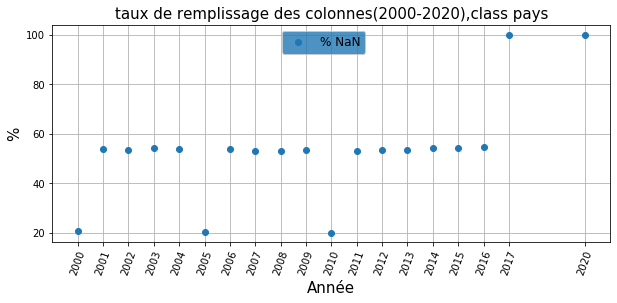

In [102]:
#Analyse des NaN par colonne
df_pays.isnull().mean()
x=[i for i in list(range(2000,2018))+ list(range(2020,2021))]
y=[round(i*100,2) for i in df_pays.loc[:,"2000":"2020"].isnull().mean().tolist()]

plt.figure(figsize=(10,4))
plt.plot(x,y,'o', label="% NaN");
BIGGER_SIZE = 15
plt.xlabel("Année")
plt.ylabel("%")
plt.title("taux de remplissage des colonnes(2000-2020),class pays")
legend=plt.legend(bbox_to_anchor=(0.4, 1),loc=2, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.xticks(x,rotation=70)
plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=BIGGER_SIZE) 
plt.savefig('NaNcolonne.png', bbox_inches='tight',format='png')
#df_pays.loc[:,"2000":"2020"].isnull().mean().tolist()

In [103]:
#essayons de connaitre les indicateurs non nul de 2020 pour France
France=pays_data[pays_data['Country Name']=="France"]
print(France.isnull().mean()["2020"])
variable_nulle=pd.isnull(France["2020"])
France_indicator=France[~variable_nulle]
filtr=France_indicator["Indicator Name"].str.contains('Female|Male', regex=True) 
France_indicator=France_indicator[~filtr] #garder juste total
France_indicator=pd.Series(list(France_indicator["Indicator Name"]))
France_indicator.to_csv("Findice.csv", encoding='utf-8')

0.9159618008185539


<i> Les indicateurs non nuls en 2020 décrivent les années moyennes de scolarité et le taux en pourcentage des plus haut niveau d'instruction atteint (primaire, secondaire, supérieur).</i>

In [104]:
#tri des colonnes par rapport au remplissage NaN
df_pays_triNaN = df_pays.loc[:, df_pays.isnull().mean() < .8]

In [106]:
#rajout des colonnes  mean,std, median et cv
df_pays_triNaN.loc[:,"mean"]=df_pays_triNaN.loc[:,"2000":"2016"].mean(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"std"]=df_pays_triNaN.loc[:,"2000":"2016"].std(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"median"]=df_pays_triNaN.loc[:,"2000":"2016"].median(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"cv"]=df_pays_triNaN["std"]/df_pays_triNaN["mean"]
df_pays_triNaN

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,mean,std,median,cv
92003,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,9.370000,NaN,NaN,NaN,NaN,12.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,12.716667,3.360079,12.690000,0.264226
92005,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,6.500000,NaN,NaN,NaN,NaN,6.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,6.713333,0.194251,6.760000,0.028935
92105,Afghanistan,AFG,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,12629.000000,NaN,NaN,NaN,NaN,15979.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,15969.000000,3335.011244,15979.000000,0.208843
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,...,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509,1422.970941,403.787930,1482.098837,0.283764
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,...,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726,3.564658,3.238375,2.828562,0.908467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883645,Zimbabwe,ZWE,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,1.020000,NaN,NaN,NaN,NaN,0.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.873333,0.136504,0.850000,0.156302
883745,Zimbabwe,ZWE,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,7233.000000,NaN,NaN,NaN,NaN,7810.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,7796.666667,557.119676,7810.000000,0.071456
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2047.748548,2099.841105,1921.570800,1609.629933,1540.330473,1480.264697,...,1667.137950,1905.837880,1997.052201,2027.933139,2040.272449,2031.020179,1714.165189,309.256730,1667.137950,0.180412
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,0.401434,0.799846,1.100000,1.800000,2.100000,2.400000,...,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989,7.413460,7.662676,3.500000,1.033617


### II-2-2) Suppressions des pays qui n'ont aucune valeur pour les indicateurs chosis

### a) Suppressions des pays sans aucune valeur  à l'accès à Internet

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
103995,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191955,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235935,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276250,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433845,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474160,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595105,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624425,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719715,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741705,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


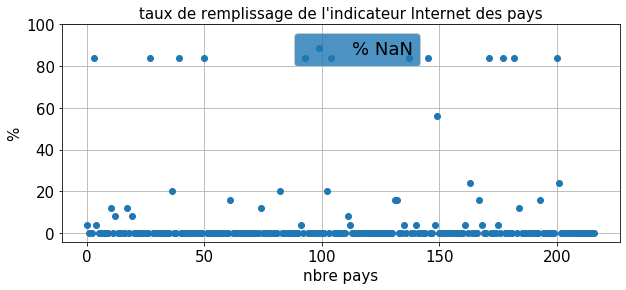

In [20]:
#Tri des pays par rapport a l'indicateur "Internet"
df_pays_triNaN_Internet=df_pays_triNaN[df_pays_triNaN["Indicator Name"]== "Internet users (per 100 people)"]

plt.figure(figsize=(10,4))
y=[round(i*100,2) for i in df_pays_triNaN_Internet.isnull().mean(axis=1).tolist()]
plt.plot(y, 'o', label="% NaN")
plt.yticks([0,20,40,60,80,100])
plt.xlabel("nbre pays")
plt.ylabel("%")
plt.title("taux de remplissage de l'indicateur Internet des pays")
legend=plt.legend(bbox_to_anchor=(0.4, 1),loc=2,  fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.savefig('Internetpays.png', bbox_inches='tight',format='png')
# Au vu de la figure analysons les pays qui ont des cases Internet assez vide
sansInternetPays=df_pays_triNaN_Internet[df_pays_triNaN_Internet.isnull().mean(axis=1) > 0.6]["Country Name"].tolist()
#df_pays_triNaN[df_pays_triNaN['Country Name'].isin(detPays)]
len(sansInternetPays)
sansInternetPays # finalement British Virgin Islands n'a pas de valeurs pour Internet
#Analysons les sansInternetPays
test=df_pays_triNaN_Internet[(df_pays_triNaN_Internet['Country Name'].isin(sansInternetPays))]
(test.loc[:,["Country Name"]]).join(test.loc[:,"2000":"2016"])

<i> Sur les <b>12</b> pays répertoriés, il n'y a qu'un seul pays qui compte au moins une case non vide pour l'indicateur Internet : c'est <b>Palau</b> </i>

In [21]:
df_pays_triNaN[df_pays_triNaN["Country Name"]=="Palau"]

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,mean,std,median,cv
638088,Palau,PLW,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638090,Palau,PLW,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638190,Palau,PLW,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638957,Palau,PLW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,10822.673560,11399.571914,12225.934158,11618.962656,12731.534802,13245.880193,...,12963.121671,13605.451972,13435.527170,14301.833811,15985.205667,16337.139841,13069.719722,1430.027162,12963.121671,0.109415
639085,Palau,PLW,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,20.243939,21.601527,26.970333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.938600,2.904240,21.601527,0.126609
640017,Palau,PLW,Population growth (annual %),SP.POP.GROW,1.555715,1.187188,0.872292,0.641648,0.526530,0.513726,...,0.628213,0.768918,0.777392,0.828300,0.915489,1.004893,0.765543,0.273649,0.641648,0.357458


<i>Cependant pour ce pays il ny a aucune valeur sur sa population ou le taux de scolarité. Aussi, on peut le retirer</i>

In [22]:
#Premier tri des pays en lien avec Internet
pays_reduit=df_pays_triNaN_Internet[df_pays_triNaN_Internet.isnull().mean(axis=1) < 0.6]["Country Name"].tolist()
df_pays_triNaN=df_pays_triNaN[df_pays_triNaN['Country Name'].isin(pays_reduit)]
print("pour cette étude il y a {} pays qui ont des données sur leur accès à internet".format(len(df_pays_triNaN['Country Name'].unique())))

pour cette étude il y a 205 pays qui ont des données sur leur accès à internet


### b) Suppression des pays sans aucune valeur à la population

In [23]:
##analyse de la population
filtr_population=df_pays_triNaN[df_pays_triNaN["Indicator Name"]== "Barro-Lee: Population in thousands, age 15+, total"]
pays_NaNPopulation=filtr_population[filtr_population["mean"].isnull()]["Country Name"].tolist()
#retrait des pays sans valeur de population
List_pays=(set(pays_reduit)-set(pays_NaNPopulation))
df_pays_triNaN=df_pays_triNaN[df_pays_triNaN['Country Name'].isin(List_pays)]


### c) Suppression des pays sans aucune valeur aux autres indicateurs

In [24]:
#verification des autres indicateurs sans valeur mean
df_pays_triNaN[df_pays_triNaN["mean"].isnull()] #Cuba et Syrian Arab Republic qui non pas de GDP 
List_pays=List_pays-{'Cuba','Syrian Arab Republic'}
df_pays_triNaN=df_pays_triNaN[df_pays_triNaN['Country Name'].isin(List_pays)]

0.0


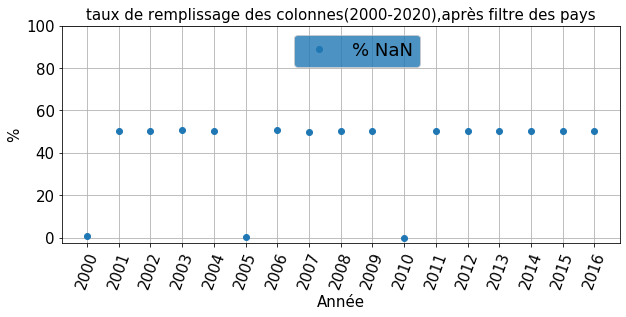

In [25]:
#Analysons a nouveau le taux de remplissage de NaN des colonnes
print(df_pays_triNaN.loc[:,"2000":"2016"].isnull().mean().min()) # 2010  a zero % NaN
#affichage des pourcentage de remplissage de NaN
plt.figure(figsize=(10,4))
plt.plot(range(2000,2017),100*df_pays_triNaN.loc[:,"2000":"2016"].isnull().mean(),'o',label="% NaN")
plt.xlabel("Année")
plt.ylabel("%")
plt.yticks([0,20,40,60,80,100])
plt.xticks(range(2000,2017),rotation=70);
plt.title("taux de remplissage des colonnes(2000-2020),après filtre des pays")
legend=plt.legend(bbox_to_anchor=(0.4, 1),loc=2, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.savefig('NaNcolonne_filtrpays.png', bbox_inches='tight',format='png')


## II-3/ Analyse et traitement des NaN 

### II-3-1/ Analyse et traitement des NaN pour les indicateurs en lien avec la population

In [26]:
#recuperation de la valeur de la population pour 2000
df_pays_triNaN_Population=df_pays_triNaN[(df_pays_triNaN["Indicator Name"]== "Barro-Lee: Population in thousands, age 15+, total")|\
                   (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)")]
df_pays_triNaN_Population_2000=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name","2000"]]
table_Population_2000 = df_pays_triNaN_Population_2000.pivot_table('2000',index=["Country Name"],columns=["Indicator Name"],
                                               aggfunc=np.mean)
valeur_population_2000=table_Population_2000.loc[:,"Barro-Lee: Population in thousands, age 15+, total"].tolist()
valeur_population_2000

[12629.0,
 2143.0,
 20070.0,
 26565.0,
 2283.0,
 15028.0,
 6753.0,
 482.0,
 80538.0,
 211.0,
 8510.0,
 145.0,
 3917.0,
 5025.0,
 1068.0,
 122354.0,
 229.0,
 6741.0,
 3374.0,
 7553.0,
 8486.0,
 24830.0,
 2147.0,
 11134.0,
 958307.0,
 28315.0,
 26492.0,
 1837.0,
 2679.0,
 9492.0,
 3738.0,
 609.0,
 8580.0,
 4352.0,
 5713.0,
 8066.0,
 43151.0,
 4046.0,
 1120.0,
 540.0,
 4237.0,
 48229.0,
 740.0,
 772.0,
 69490.0,
 11679.0,
 9306.0,
 6244.0,
 516.0,
 4723.0,
 3743.0,
 5540.0,
 8494.0,
 215.0,
 672684.0,
 146081.0,
 42998.0,
 14374.0,
 2979.0,
 4364.0,
 49468.0,
 1730.0,
 108437.0,
 3019.0,
 10898.0,
 17165.0,
 37028.0,
 1647.0,
 3228.0,
 3022.0,
 1947.0,
 1057.0,
 1627.0,
 3559.0,
 2805.0,
 354.0,
 345.0,
 6196.0,
 15236.0,
 162.0,
 6009.0,
 313.0,
 1500.0,
 881.0,
 66378.0,
 3126.0,
 1620.0,
 19465.0,
 9997.0,
 32216.0,
 1070.0,
 14429.0,
 12960.0,
 2946.0,
 2875.0,
 6013.0,
 3603.0,
 83763.0,
 2010.0,
 3096.0,
 3298.0,
 16995.0,
 47338.0,
 31222.0,
 8567.0,
 449.0,
 18071.0,
 119858.0,
 4

In [27]:
#traitement des NaN pour 2001
df_pays_triNaN_Population_2001=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name","2001"]]
table_Population_2001 = df_pays_triNaN_Population_2001.pivot_table('2001',index=["Country Name"],columns=["Indicator Name"],
                                               aggfunc=np.mean)
table_Population_2001["Barro-Lee: Population in thousands, age 15+, total"]=valeur_population_2000*\
(table_Population_2001.loc[:,"Population growth (annual %)"]/100+1)
valeur_population_2001=table_Population_2001.loc[:,"Barro-Lee: Population in thousands, age 15+, total"].tolist()

table_Population_2001

df_pays_triNaN.loc[df_pays_triNaN["Indicator Name"] == "Barro-Lee: Population in thousands, age 15+, total","2001"]=\
valeur_population_2001

In [28]:
#creation de la fonction avec la base du traitement pour 2001 pour traiter les autres annees
def valeur_population(annee,valeur_population_anAvant,df_pays_triNaN):
    df_pays_triNaN_Population=df_pays_triNaN[(df_pays_triNaN["Indicator Name"]== "Barro-Lee: Population in thousands, age 15+, total")|\
                   (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)")]
    df_pays_triNaN_Population_an=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name",annee]]
    table_Population_an = df_pays_triNaN_Population_an.pivot_table(annee,index=["Country Name"],
                                                                   columns=["Indicator Name"], aggfunc=np.mean)
    table_Population_an["Barro-Lee: Population in thousands, age 15+, total"]=valeur_population_anAvant*\
    (table_Population_an.loc[:,"Population growth (annual %)"]/100+1)
    valeur_population_an=table_Population_an.loc[:,"Barro-Lee: Population in thousands, age 15+, total"].tolist()
    df_pays_triNaN.loc[df_pays_triNaN["Indicator Name"] == "Barro-Lee: Population in thousands, age 15+, total",annee]=\
valeur_population_an
    

    return valeur_population_an

In [29]:
valeur_population_2002=valeur_population("2002",valeur_population_2001,df_pays_triNaN)

In [30]:
valeur_population_2003=valeur_population("2003",valeur_population_2002,df_pays_triNaN)

In [31]:
valeur_population_2004=valeur_population("2004",valeur_population_2003,df_pays_triNaN)

In [32]:
valeur_population_2005=valeur_population("2005",valeur_population_2004,df_pays_triNaN)

In [33]:
valeur_population_2006=valeur_population("2006",valeur_population_2005,df_pays_triNaN)

In [34]:
valeur_population_2007=valeur_population("2007",valeur_population_2006,df_pays_triNaN)

In [35]:
valeur_population_2008=valeur_population("2008",valeur_population_2007,df_pays_triNaN)

In [36]:
valeur_population_2009=valeur_population("2009",valeur_population_2008,df_pays_triNaN)

In [37]:
#Analyse du fichier Population
df_pays_triNaN_Population=df_pays_triNaN[(df_pays_triNaN["Indicator Name"]== "Barro-Lee: Population in thousands, age 15+, total")|\
                   (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)")]
df_pays_triNaN_Population.loc[:,"2005":"2016"]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
92105,15681.888185,16188.198307,16634.219656,17052.166714,17490.256370,19299.000000,NaN,NaN,NaN,NaN,NaN,NaN
93932,3.870470,3.228630,2.755225,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163
95770,2089.044540,2075.864523,2060.176826,2044.368204,2030.591328,2431.000000,NaN,NaN,NaN,NaN,NaN,NaN
97597,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880
99435,21415.579054,21728.184127,22061.502801,22419.185518,22804.956333,25853.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
878242,2.787664,2.767590,2.754970,2.742468,2.729135,2.713034,2.697367,2.676050,2.639892,2.585905,2.520254,2.451502
880080,6544.679590,6722.151769,6905.562460,7096.374593,7296.345703,7000.000000,NaN,NaN,NaN,NaN,NaN,NaN
881907,2.694506,2.711702,2.728452,2.763166,2.817933,2.883152,2.950426,3.005133,3.036918,3.040211,3.024123,3.002816
883745,7655.290807,7763.515164,7884.217237,8018.257311,8165.993464,8347.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#recuperation des valeurs de la population pour 2010
df_pays_triNaN_Population_2010=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name","2010"]]
table_Population_2010 = df_pays_triNaN_Population_2010.pivot_table('2010',index=["Country Name"],columns=["Indicator Name"],
                                               aggfunc=np.mean)
valeur_population_2010=table_Population_2010.loc[:,"Barro-Lee: Population in thousands, age 15+, total"].tolist()
#la fonction ne marche pas pour 2011
#analyse de la situation
len(valeur_population_2010),len(valeur_population_2009)

(142, 142)

In [39]:
#analyse pour 2011
annee="2011"
df_pays_triNaN_Population_2011=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name","2011"]]
table_Population_2011 = df_pays_triNaN_Population_2011.pivot_table(annee,index=["Country Name"],
                                                                   columns=["Indicator Name"], aggfunc=np.mean)

List_pays_table_Population_2011=table_Population_2011.iloc[:,0].index.tolist()
List_pays_table_Population_2000=table_Population_2000.iloc[:,0].index.tolist()

#dd.index(3.095118614892)
print(len(List_pays_table_Population_2011), len(List_pays_table_Population_2000))
print(set(List_pays_table_Population_2000)-set(List_pays_table_Population_2011)) #un pays en moins :Croatie


141 142
{'Croatia'}


In [40]:
#Analyse du pays seul sans valeur): Croatie
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Croatia")]
analyse=df_pays_triNaN.loc[(df_pays_triNaN["Indicator Name"]== "Population growth (annual %)"),
                   ["Country Name","2010","mean","std","cv"]]
#choix de l'imputation (soit la moyenne soit la valeur de 2010)
analyse=analyse.sort_values("std",ascending = True)
analyse=analyse.reset_index()
analyse[analyse["Country Name"]== "Croatia"] #grand ecart type

,index,Country Name,2010,mean,std,cv
127,269852,Croatia,-0.25539,-0.352543,0.70592,-2.002366


In [41]:
#imputation la valeur de 2010 pour la case vide du taux de croissance de 2011
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Croatia")&\
                             (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)"),"2011"]=\
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Croatia")&\
                             (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)"),"2010"]

In [42]:
#verification
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Croatia")&\
                             (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)"),"2011"]

269852   -0.25539
Name: 2011, dtype: float64

In [43]:
valeur_population_2011=valeur_population("2011",valeur_population_2010,df_pays_triNaN)
len(valeur_population_2011)

142

In [44]:
valeur_population_2012=valeur_population("2012",valeur_population_2011,df_pays_triNaN)

In [45]:
valeur_population_2013=valeur_population("2013",valeur_population_2012,df_pays_triNaN)

In [46]:
valeur_population_2014=valeur_population("2014",valeur_population_2013,df_pays_triNaN)

In [47]:
valeur_population_2015=valeur_population("2015",valeur_population_2014,df_pays_triNaN)

In [48]:
valeur_population_2016=valeur_population("2016",valeur_population_2015,df_pays_triNaN)

In [49]:
#rajout des colonnes  mean,std et median
df_pays_triNaN.loc[:,"mean"]=ddf_pays_triNaN.loc[:,"2000":"2016"].mean(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"std"]=df_pays_triNaN.loc[:,"2000":"2016"].std(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"median"]=df_pays_triNaN.loc[:,"2000":"2016"].median(axis=1, skipna=True, numeric_only=True)
df_pays_triNaN.loc[:,"cv"]=df_pays_triNaN.loc[:,"std"]/df_pays_triNaN.loc[:,"mean"]
df_pays_triNaN

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,mean,std,median,cv
92003,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,9.370000,NaN,NaN,NaN,NaN,12.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.502271,5.688931,9.502271,0.598692
92005,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,6.500000,NaN,NaN,NaN,NaN,6.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.821271,3.126273,6.500000,0.648433
92105,Afghanistan,AFG,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,12629.000000,13165.922454,13787.423571,14451.707308,15097.542315,15681.888185,...,19896.326941,20547.474615,21228.669451,21904.420766,22549.119166,23155.501842,15972.382546,5773.498331,16188.198307,0.361468
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,...,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509,1293.730334,529.075730,1293.730334,0.408954
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,...,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726,3.397856,2.939416,3.141094,0.865080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883645,Zimbabwe,ZWE,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,1.020000,NaN,NaN,NaN,NaN,0.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.654630,0.361680,0.750000,0.552496
883745,Zimbabwe,ZWE,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,7233.000000,7317.669289,7396.747897,7475.248076,7559.742545,7655.290807,...,8523.094347,8713.014983,8914.230416,9123.251208,9337.250108,9555.374765,7382.436934,2471.154071,7796.666667,0.334734
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2047.748548,2099.841105,1921.570800,1609.629933,1540.330473,1480.264697,...,1667.137950,1905.837880,1997.052201,2027.933139,2040.272449,2031.020179,1562.967118,546.167549,1609.629933,0.349443
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,0.401434,0.799846,1.100000,1.800000,2.100000,2.400000,...,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989,6.946616,7.026413,4.000000,1.011487


In [50]:
#verification du DataFrame
df_pays_triNaN_Population=df_pays_triNaN[(df_pays_triNaN["Indicator Name"]== "Barro-Lee: Population in thousands, age 15+, total")|\
                   (df_pays_triNaN["Indicator Name"]== "Population growth (annual %)")]
df_pays_triNaN_Population.loc[:,"2005":"2016"]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
92105,15681.888185,16188.198307,16634.219656,17052.166714,17490.256370,19299.000000,19896.326941,20547.474615,21228.669451,21904.420766,22549.119166,23155.501842
93932,3.870470,3.228630,2.755225,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163
95770,2089.044540,2075.864523,2060.176826,2044.368204,2030.591328,2431.000000,2424.460189,2420.456167,2416.021616,2411.019316,2403.998288,2400.154766
97597,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880
99435,21415.579054,21728.184127,22061.502801,22419.185518,22804.956333,25853.000000,26350.615074,26879.370252,27426.658885,27975.374850,28512.490584,29032.975673
...,...,...,...,...,...,...,...,...,...,...,...,...
878242,2.787664,2.767590,2.754970,2.742468,2.729135,2.713034,2.697367,2.676050,2.639892,2.585905,2.520254,2.451502
880080,6544.679590,6722.151769,6905.562460,7096.374593,7296.345703,7000.000000,7206.529851,7423.095646,7648.528993,7881.060395,8119.393375,8363.203779
881907,2.694506,2.711702,2.728452,2.763166,2.817933,2.883152,2.950426,3.005133,3.036918,3.040211,3.024123,3.002816
883745,7655.290807,7763.515164,7884.217237,8018.257311,8165.993464,8347.000000,8523.094347,8713.014983,8914.230416,9123.251208,9337.250108,9555.374765


### II-3-2/ Analyse et traitement des NaN pour le PIB

Country Name,Afghanistan,Bahrain,Libya,Maldives,"Venezuela, RB"
2000,NaN,35622.601699,17375.646482,NaN,11424.204487
2001,NaN,35578.884295,17186.163880,3028.964812,11858.333888
2002,875.517610,35516.293232,17010.813583,3186.756294,10775.348399
2003,922.829449,36258.092483,19299.516457,8865.268799,9957.685837
2004,916.334475,37399.844814,20392.476154,9410.998137,11891.624668
2005,1011.595524,38466.562206,23189.827241,8201.885856,13309.697636
2006,1065.619665,39163.120453,25071.944342,10277.110223,14821.148001
2007,1210.479265,40282.966524,26966.496200,10843.471770,16276.925627
2008,1247.066144,40557.024312,27843.125645,11670.187862,17192.915451
2009,1482.098837,39412.167409,27523.817457,10969.393572,16507.341352


<Figure size 432x288 with 0 Axes>

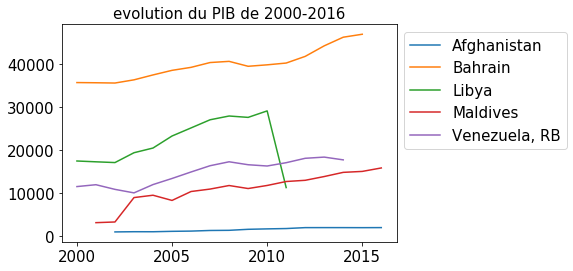

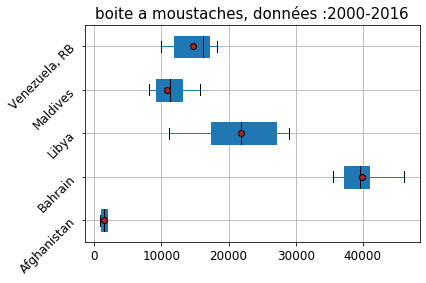

In [51]:
#Analyse et traitement des NaN pour le PIB 
df_pays_triNaN_GDP=df_pays_triNaN[df_pays_triNaN["Indicator Name"]=='GDP per capita, PPP (current international $)']
pays_GDP_AvecNaN=df_pays_triNaN_GDP[df_pays_triNaN_GDP.isnull().any(axis=1)]
table_pays_GDP_AvecNaN=pays_GDP_AvecNaN.pivot_table(pays_GDP_AvecNaN.columns[4:21],columns=["Country Name"],aggfunc=np.mean)
#print(table_pays_GDP_AvecNaN)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(6,4))
table_pays_GDP_AvecNaN.plot()
#plt.gca().set_xticklabels(range(2000,2017),rotation=0)
#plt.xticks(range(6),rotation=0)
plt.legend(bbox_to_anchor=(1, 1),loc=2)
plt.rc('legend', fontsize='x-small')
plt.title('evolution du PIB de 2000-2016')
plt.figure(figsize=(6,4))
table_pays_GDP_AvecNaN.boxplot(rot=45, fontsize=12, figsize=(8,10),
                               showfliers=False, medianprops=medianprops,vert=False,
                               patch_artist=True, showmeans=True,meanprops=meanprops)
plt.title('boite a moustaches, données :2000-2016')


table_pays_GDP_AvecNaN

<i>Les valeurs manquantes de l'Afghanistan sont en 2000 et 2001.
Comme l'évolution de son PIB est faiblement croissance et montre un faible écart sur la boite à moustaches, 
je vais remplacer ces vides par celle de 2002.
Pour les Maldives je peux faire de même (imputer la valeur 2001 à 2000).
pour Bahrain c'est 2016 qui manque. Comme le pays présente une assez bonne croissance du PIB (en dehors 
de la crise de 2008). je vais imputer la valeur de 2015 à 2016  (cela va améliorer la moyenne du pays).
La Lybie est le pays qui a le plus de données manquantes en GDP (case vide à partir de 2012).
Après le printemps arabe et le changement de régime en 2011 le pays est toujours instable.
Le venezuela est également en crise depuis 2015 (bras de fer avec l'opposition). 
->->je choisis de supprimer ces deux pays</i>

In [52]:
#suppressions de Venezuela, Libya
df_pays_triNaN.drop(df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Venezuela, RB") |\
                                      (df_pays_triNaN["Country Name"]== "Libya")].index, inplace=True)

In [53]:
print("Il y aura {} pays pour cette etude".format(df_pays_triNaN["Country Name"].unique().size))

Il y aura 140 pays pour cette etude


In [54]:
#traitement des NaN pour l'Afghanistan
for i in range(2000,2002):
    val=str(i)
    df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Afghanistan")&\
                       (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                       val]=df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Afghanistan")&\
                                               (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                                               "2002"]

In [55]:
#traitement des NaN pour les Maldives
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Maldives")&\
                             (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                   "2000"]=df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Maldives")&\
                             (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                   "2001"]

In [56]:
#traitement des NaN pour Bahrain
df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Bahrain")&\
                             (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                   "2016"]=df_pays_triNaN.loc[(df_pays_triNaN["Country Name"]== "Bahrain")&\
                             (df_pays_triNaN["Indicator Name"]== "GDP per capita, PPP (current international $)"),
                   "2015"]

### II-3-3/ Analyse des NaN pour l'accès à l'Internet

Country Name,Afghanistan,Australia,Belize,Guyana,Iraq,Liberia,Mongolia,Myanmar,Pakistan,Rwanda,Serbia,Sudan
2000,NaN,46.756116,5.963835,6.611492,NaN,0.017703,1.255652,NaN,NaN,0.062831,NaN,0.025785
2001,0.004723,52.689266,NaN,13.206986,0.100000,0.033812,1.653238,0.000289,1.318551,0.240672,NaN,0.140185
2002,0.004561,NaN,5.684251,NaN,0.500000,0.032713,2.039573,0.000426,2.577427,0.292785,NaN,0.439478
2003,0.087891,NaN,NaN,NaN,0.600000,0.031869,NaN,0.024064,5.041158,0.356918,NaN,0.538472
2004,0.105809,NaN,9.800000,NaN,0.900000,0.031011,NaN,0.024337,6.164321,0.430854,23.500000,0.791562
2005,1.224148,63.000000,17.000000,NaN,0.900000,NaN,NaN,0.065239,6.332329,0.556041,26.300000,1.292041
2006,2.107124,66.000000,24.000000,NaN,0.952344,NaN,NaN,0.182048,6.500000,NaN,27.200000,NaN
2007,1.900000,69.450000,24.600000,13.800000,0.930000,0.551377,9.000000,0.217128,6.800000,2.115387,33.150000,8.660000
2008,1.840000,71.670000,26.300000,18.200000,1.000000,0.530000,9.800000,0.220000,7.000000,4.500000,35.600000,NaN
2009,3.550000,74.250000,27.200000,23.900000,1.060000,2.000000,10.000000,0.220000,7.500000,7.700000,38.100000,NaN


<Figure size 432x288 with 0 Axes>

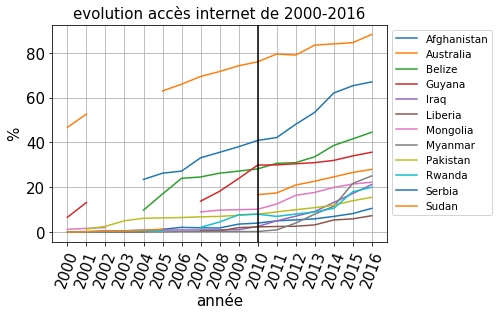

In [57]:
df_pays_triNaN_Internet=df_pays_triNaN[df_pays_triNaN["Indicator Name"]=="Internet users (per 100 people)"]
pays_Internet_AvecNaN=df_pays_triNaN_Internet[df_pays_triNaN_Internet.isnull().any(axis=1)]
table_pays_Internet_AvecNaN=pays_Internet_AvecNaN.pivot_table(pays_Internet_AvecNaN.columns[4:21],
                                                         columns=["Country Name"],aggfunc=np.mean)

plt.figure(figsize=(6,4))
table_pays_Internet_AvecNaN.plot()
plt.legend(bbox_to_anchor=(1, 1),loc=2)
plt.rc('legend', fontsize='small')
plt.axvline(x=10, color='k')
plt.title('evolution accès internet de 2000-2016')
plt.xlabel("année")
plt.ylabel("%");
plt.gca().set_xticklabels(range(2000,2017),rotation=70)
plt.xticks(range(0,17),rotation=70);
plt.grid()
plt.savefig('NaNInternet.png', bbox_inches='tight',format='png')
table_pays_Internet_AvecNaN

<i>Le pourcentage de l'accès à Internet est relativement croissant.
à partir de 2010, tous les pays ont des valeurs pour l'indicateur 'internet'.</i>

### II-3-4/ Analyse et traitement des NaN pour les indicateurs liés au taux de scolarite

In [58]:
df_pays_triNaN_Second=\
df_pays_triNaN[df_pays_triNaN["Indicator Name"]=="Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)"]
pays_Second_AvecNaN=df_pays_triNaN_Second[df_pays_triNaN_Second.isnull().any(axis=1)]
table_pays_Second_AvecNaN=pays_Second_AvecNaN.pivot_table(pays_Second_AvecNaN.columns[4:21],
                                                         columns=["Country Name"],aggfunc=np.mean)

table_pays_Second_AvecNaN 

Country Name,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,Barbados,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,9.37,73.04,22.35,41.31,75.02,65.32,57.19,52.36,29.39,79.94,...,7.87,53.75,47.14,46.69,48.26,41.73,32.53,13.63,27.74,53.87
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,12.69,81.03,19.63,49.91,73.33,62.48,58.90,49.40,36.67,86.56,...,15.48,54.74,50.00,52.58,47.41,42.15,43.93,19.26,31.19,55.14
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<i>Les 140 pays ne sont remplis que pour <b>2000,2005,2010</b>. <br/>
je retrouve les mêmes résultats avec l'indicateur :  <br/>
Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)  <br/>
Je choisi de remplaçcer les données manquantes des taux de scolarité par la valeur moyenne.</i>

In [59]:
df_pays_analyse=df_pays_triNaN.copy() # pour plus tard un autre analyse
#traitement des NaN pour le taux de scolarité
for i in range(2011,2017):
    val=str(i)
    df_pays_triNaN[val]=np.where(df_pays_triNaN[val].isna(),df_pays_triNaN["mean"],
                                   df_pays_triNaN[val])

df_pays_triNaN.loc[:,"2010":"2016"]

,2010,2011,2012,2013,2014,2015,2016
92003,16.090000,9.502271,9.502271,9.502271,9.502271,9.502271,9.502271
92005,6.880000,4.821271,4.821271,4.821271,4.821271,4.821271,4.821271
92105,19299.000000,19896.326941,20547.474615,21228.669451,21904.420766,22549.119166,23155.501842
92872,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509
93000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
...,...,...,...,...,...,...,...
883645,0.750000,0.654630,0.654630,0.654630,0.654630,0.654630,0.654630
883745,8347.000000,8523.094347,8713.014983,8914.230416,9123.251208,9337.250108,9555.374765
884512,1445.042395,1667.137950,1905.837880,1997.052201,2027.933139,2040.272449,2031.020179
884640,6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989


0.0


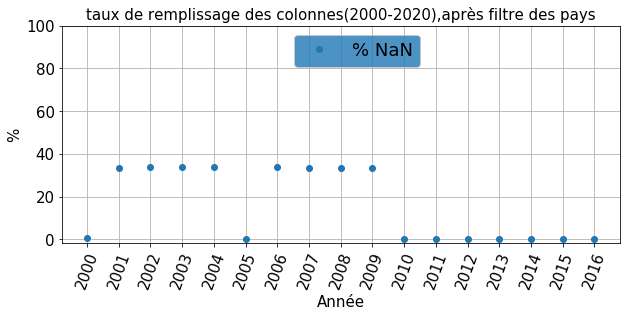

In [60]:
#Analysons a nouveau le taux de remplissage de NaN des colonnes
print(df_pays_triNaN.loc[:,"2000":"2016"].isnull().mean().min()) # 2010  a zero % NaN
#affichage des pourcentage de remplissage de NaN
plt.figure(figsize=(10,4))
plt.plot(range(2000,2017),100*df_pays_triNaN.loc[:,"2000":"2016"].isnull().mean(),'o',label="% NaN")
plt.xlabel("Année")
plt.ylabel("%")
plt.yticks([0,20,40,60,80,100])
plt.xticks(range(2000,2017),rotation=70);
plt.title("taux de remplissage des colonnes(2000-2020),après filtre des pays")
legend=plt.legend(bbox_to_anchor=(0.4, 1),loc=2, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.savefig('NaNcolonne_traitement.png', bbox_inches='tight',format='png')


# III/ Analyse de l'évolution moyenne de la population

['Australia', 'Saudi Arabia', 'Greece', 'Ecuador', 'Cambodia', 'Zimbabwe', 'Niger', 'Tunisia', 'Sweden', 'Malawi', 'Austria', 'Zambia', 'El Salvador', 'Burundi', 'Paraguay', 'United Arab Emirates', 'Norway', 'Papua New Guinea', 'Croatia', 'Togo', 'Ireland', 'Sierra Leone', 'Armenia', 'Congo, Rep.', 'Albania', 'Kuwait', 'Latvia', 'Jamaica']
28
43


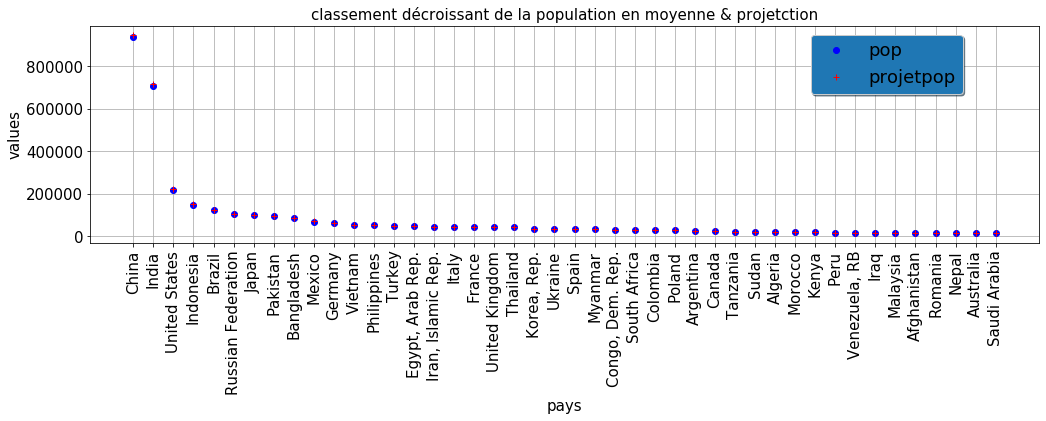

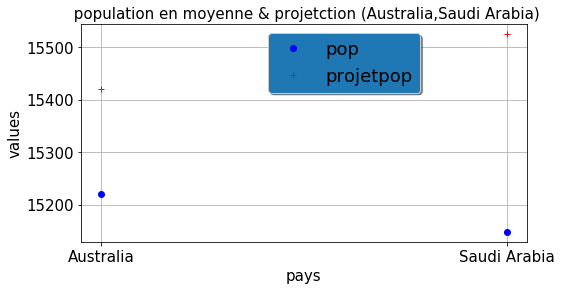

In [61]:
#comprehension de l'evolution moyenne de la population
df_pays_triNaN_Population_mean=df_pays_triNaN_Population.loc[:,["Country Name","Indicator Name","mean"]]
table_Population_mean = df_pays_triNaN_Population_mean.pivot_table('mean',index=["Country Name"],columns=["Indicator Name"],
                                               aggfunc=np.mean)
#creation de la colonne :projection Population
table_Population_mean["projection Pop"]=table_Population_mean.loc[:,"Barro-Lee: Population in thousands, age 15+, total"]*\
table_Population_mean.loc[:,"Population growth (annual %)"]/100 +\
table_Population_mean.loc[:,"Barro-Lee: Population in thousands, age 15+, total"]

#analysons le classement moyen de la population etcelle de son evolution
df_evolutionPopulation_mean=table_Population_mean.sort_values("projection Pop",ascending = False)
evolutionPopulation_mean_List=df_evolutionPopulation_mean.index.tolist()
df_population_mean=table_Population_mean.sort_values("Barro-Lee: Population in thousands, age 15+, total",
                                                     ascending = False)
population_mean_List=df_population_mean.index.tolist() 
#affichage des différences sur le positionnement des pays
print([i for i, j in zip(population_mean_List,evolutionPopulation_mean_List) if i != j]) 
print(len([i for i, j in zip(population_mean_List,evolutionPopulation_mean_List) if i != j]))#28 pays

# le preimer affecte est 'Australia'. Determinons la position suivante
print(len(df_population_mean.loc[:"Australia","Barro-Lee: Population in thousands, age 15+, total"].index.tolist()))
df_population_mean.iloc[43,:] # le pays suivant est Saudi Arabia
x=range(len(df_population_mean.loc[:"Saudi Arabia",
                                   "Barro-Lee: Population in thousands, age 15+, total"].index.tolist()))
plt.figure(figsize=(17,4))
plt.plot(df_population_mean.loc[:"Saudi Arabia",
                                "Barro-Lee: Population in thousands, age 15+, total"].tolist(), 'o',color='blue', label='pop');
plt.plot(df_population_mean.loc[:"Saudi Arabia","projection Pop"].tolist(),'+', label='projetpop', color='red');
plt.gca().set_xticklabels(df_population_mean.loc[:"Saudi Arabia",
                                                 "Barro-Lee: Population in thousands, age 15+, total"].index.tolist(),rotation=90)
plt.xticks(x,rotation=90)
plt.xlabel("pays")
plt.ylabel("values")
plt.title("classement décroissant de la population en moyenne & projetction")
legend=plt.legend(bbox_to_anchor=(0.75, 1),loc=2, shadow=True, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.savefig('evol_pop_moyenne.png', bbox_inches='tight',format='png')
                                                 
plt.figure(figsize=(8,4))
plt.plot(df_population_mean.loc["Australia":"Saudi Arabia",
                                "Barro-Lee: Population in thousands, age 15+, total"].tolist(), 'o',color='blue', label='pop');
plt.plot(df_population_mean.loc["Australia":"Saudi Arabia",
                                "projection Pop"].tolist(),'+', label='projetpop', color='red');
plt.gca().set_xticklabels(df_population_mean.loc["Australia":"Saudi Arabia",
                                                 "Barro-Lee: Population in thousands, age 15+, total"].index.tolist(),rotation=90)
plt.xticks(range(2),rotation=0)
plt.xlabel("pays")
plt.ylabel("values");
plt.title(" population en moyenne & projetction (Australia,Saudi Arabia)")
legend=plt.legend(bbox_to_anchor=(0.4, 1),loc=2, shadow=True, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.savefig('evol_pop_2pays.png', bbox_inches='tight',format='png')

 <i> J'en conclu que même si en moyenne le classement change pour certains pays,  cela n'influence pas les pays de forte population. </i>

# IV/ Études des regions 

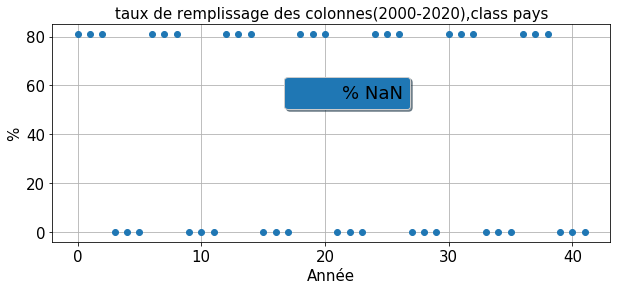

In [62]:
df_region =recupInd(Indicateurs,region_data) 
df_region_triNaN=df_region.drop(['2017',"2020"], axis=1)
plt.figure(figsize=(10,4))
y=[round(i*100,2) for i in df_region_triNaN.isnull().mean(axis=1).tolist()]
plt.plot(y, 'o', label="% NaN")
plt.title("taux de remplissage des colonnes(2000-2020),class pays")
legend=plt.legend(bbox_to_anchor=(0.4, 0.8),loc=2, shadow=True, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.xlabel("Année")
plt.ylabel("%")
plt.savefig('NaNregion.png', bbox_inches='tight',format='png')
df_region_triNaN[df_region_triNaN["Country Name"]== "East Asia & Pacific"].loc[:,"Indicator Name":"2016"]
#trides NaN
df_region_triNaN=df_region_triNaN[df_region_triNaN.isnull().mean(axis=1)<0.8]

In [63]:
#choix des Indicateurs pour la region : Indicateurs non null
Indicateurs_region=['Internet users (per 100 people)',
 'GDP per capita, PPP (current international $)',
 'Population growth (annual %)',]
keysInd=['Internet','GDP','taux de croissance']

<Figure size 432x288 with 0 Axes>

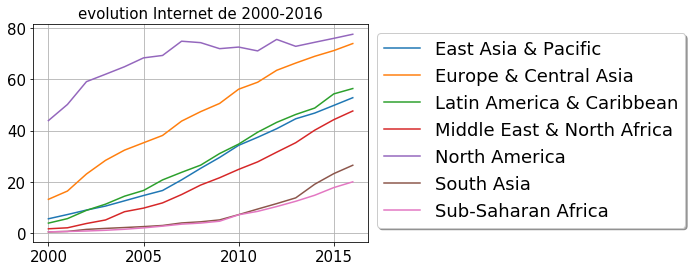

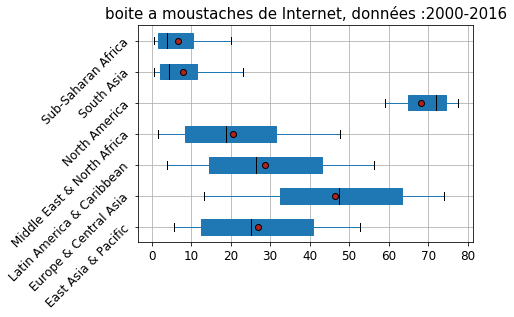

<Figure size 432x288 with 0 Axes>

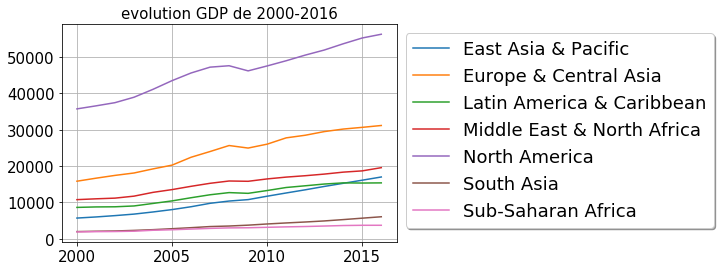

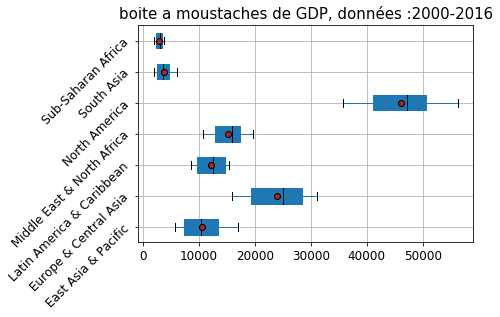

<Figure size 432x288 with 0 Axes>

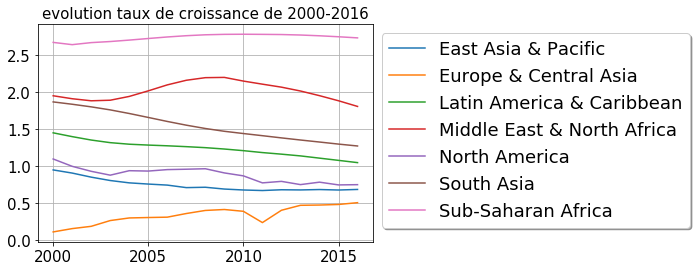

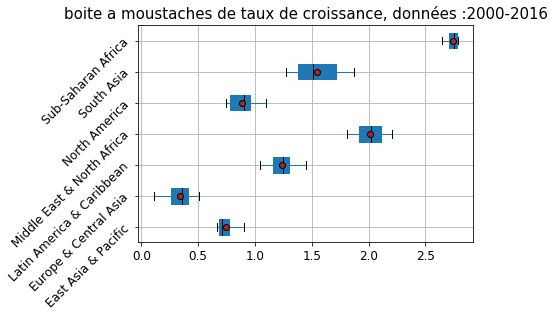

In [64]:
#Analyse des Indicateurs non null
j=0
for i in Indicateurs_region:
    keys=keysInd[j]
    df_region_Indicateur=df_region_triNaN[df_region_triNaN["Indicator Name"]== i]
    table_region_Indicateur=df_region_Indicateur.pivot_table(columns=["Country Name"],
                                                             aggfunc=np.mean)

    
    plt.figure(figsize=(6,4))
    table_region_Indicateur.plot()
    plt.legend(bbox_to_anchor=(1, 1),loc=2, shadow=True, fontsize='large')
    #legend.get_frame().set_facecolor('C0')
    plt.grid()
    plt.rc('legend', fontsize='small')
    plt.title("evolution "+keys+" de 2000-2016")
    plt.savefig('plot_region'+keys+'.png', bbox_inches='tight',format='png')
    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.figure(figsize=(6,4))
    table_region_Indicateur.boxplot(rot=45, fontsize=12, figsize=(8,10),
                                  showfliers=False, medianprops=medianprops,vert=False,
                                  patch_artist=True, showmeans=True,meanprops=meanprops)
    plt.title("boite a moustaches de "+keys+", données :2000-2016");
    plt.savefig('moust_region'+keys+'.png', bbox_inches='tight',format='png')
    
    j=j+1

<i> L'analyse des régions montre qu'il n y a pas de données pour vraiment  évaluer le <b>potentiel étudiant</b> (taux de scolarité, population). Cependant, en analysant les Indicateurs liés à l'accès à Internet et le PIB je constate que <b>l’Amérique de nord</b> est la première région à exploiter. Ensuite viens <b>l’Europe et l’Asie central</b> </i>

# V/ Analyse exploratoire (étude des pays prioritaires)

## V-1/ Calcul du score pour 2010

In [65]:
df_etudeScore_2010=df_pays_triNaN.loc[:,["Country Name","Indicator Name","2010"]]
df_etudeScore_2010 = df_etudeScore_2010.pivot_table('2010',index=["Country Name"],columns=["Indicator Name"], aggfunc=np.mean)
df_etudeScore_2010=df_etudeScore_2010.drop('Population growth (annual %)',axis=1)
#calcul du potentiel etudiant
df_etudeScore_2010["potentiel etudiant"]=(df_etudeScore_2010.loc[:,'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)']+\
                                          df_etudeScore_2010.loc[:,'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)'])*\
df_etudeScore_2010.loc[:,'Barro-Lee: Population in thousands, age 15+, total']/100

In [66]:
#class en fonction du percentile
def class_indicateur(Name_Indicateur,df_etude):
    df = df_etude.reset_index()
    valeur=[st.percentileofscore(df[Name_Indicateur],
                     df.loc[i,Name_Indicateur]) for i in range(140)]
    return valeur

In [67]:
df_etudeScore_2010["class GDP"]=class_indicateur('GDP per capita, PPP (current international $)',
                                                  df_etudeScore_2010)
df_etudeScore_2010["class potentiel etudiant"]=class_indicateur("potentiel etudiant",
                                                                  df_etudeScore_2010)
df_etudeScore_2010["class Internet"]=class_indicateur("Internet users (per 100 people)",
                                                                  df_etudeScore_2010)
df_etudeScore_2010["score"]=(df_etudeScore_2010.loc[:,"class potentiel etudiant"]*1+\
                               df_etudeScore_2010.loc[:,"class Internet"]*3+df_etudeScore_2010.loc[:,"class GDP"]*2)/6
df_etudeScore_2010["score"]=[round(i,2) for i in df_etudeScore_2010.iloc[:,9]]
df_etudeScore_2010=df_etudeScore_2010.sort_values("score",ascending = False)
df_etudeScore_2010


Indicator Name,Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary),"Barro-Lee: Population in thousands, age 15+, total","GDP per capita, PPP (current international $)",Internet users (per 100 people),potentiel etudiant,class GDP,class potentiel etudiant,class Internet,score
Country Name,,,,,,,,,,
Netherlands,63.63,25.79,13722.0,44585.526226,90.72,12270.2124,92.142857,76.428571,98.571429,92.74
Germany,73.00,21.48,71607.0,39263.187791,82.00,67654.2936,85.714286,95.000000,92.857143,90.83
Norway,67.70,26.31,3859.0,58077.588998,93.39,3627.8459,95.714286,51.428571,99.642857,90.30
United Kingdom,59.45,25.50,50276.0,35909.799150,85.00,42709.4620,82.142857,92.142857,95.000000,90.24
United States,42.96,53.94,249660.0,48373.878816,71.69,241920.5400,93.571429,98.571429,85.000000,90.12
...,...,...,...,...,...,...,...,...,...,...
Liberia,20.04,3.82,1986.0,685.500686,2.30,473.8596,1.428571,13.571429,7.857143,6.67
Sierra Leone,25.28,2.16,3493.0,1192.596559,0.58,958.4792,6.428571,22.857143,1.428571,6.67
Central African Republic,17.78,1.57,2518.0,870.044081,2.00,487.2330,3.571429,14.285714,6.071429,6.61


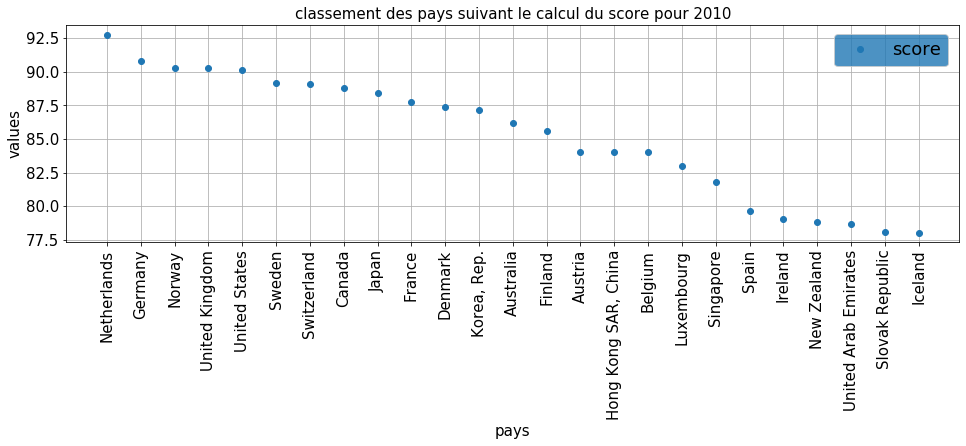

In [68]:
x=[i for i in range(1,26)]
y=list(range(120,140,5))
plt.figure(figsize=(16,4))
df_etudeScore_2010["score"][:25]
plt.plot(x,df_etudeScore_2010["score"][:25],'o',label='score')
valPays=df_etudeScore_2010.index.tolist()[:25]
plt.gca().set_xticklabels(valPays,rotation=90)
plt.xticks(x)
plt.xlabel("pays")
plt.ylabel("values")
legend=plt.legend(bbox_to_anchor=(0.85, 1),loc=2, fontsize='large')
legend.get_frame().set_facecolor('C0')
plt.grid()
plt.title("classement des pays suivant le calcul du score pour 2010");
plt.savefig('Classement_2010_point.png', bbox_inches='tight',format='png')

<i>Même si l'année 2010 est l'année qui a des valeurs non approximatives, se baser sur 2010 pour définir les pays prioritaires peut être risqué car ce n'est pas la plus récente.</i> 

## V-2/ Calcul du score de 2010-2016

In [69]:
df_etude=df_pays_triNaN.loc[:,["Country Name","Indicator Name"]].join(df_pays_triNaN.loc[:,'2010':'2016'])
df_etude.loc[:,"mean"]=df_etude.loc[:,:].mean(axis=1, skipna=True, numeric_only=True)
#df_etude

In [70]:
df_etudeScore=df_etude.set_index(["Country Name","Indicator Name"]).unstack()


df_etudeScore[("mean","projection Population")]=df_etudeScore[("mean","Barro-Lee: Population in thousands, age 15+, total")]*\
df_etudeScore[("mean","Population growth (annual %)")]/100 +\
df_etudeScore[("mean","Barro-Lee: Population in thousands, age 15+, total")]


In [71]:
df_etudeScore=df_etudeScore.drop('Population growth (annual %)',level=1, axis=1)
colonne_etude=[i for i in range(2010,2017)]
colonne_etude.append("mean")


for i in colonne_etude:
    val=str(i)
    df_etudeScore[(val,"potentiel etudiant")]=\
    (df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)')]+\
     df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)')])*\
    df_etudeScore[(val,'Barro-Lee: Population in thousands, age 15+, total')]/100
    df_etudeScore[(val,"class GDP")]=class_indicateur('GDP per capita, PPP (current international $)',
                                                  df_etudeScore[val])
    df_etudeScore[(val,"class potentiel etudiant")]=class_indicateur("potentiel etudiant",
                                                                          df_etudeScore[val])
    df_etudeScore[(val,"class Internet")]=class_indicateur("Internet users (per 100 people)",
                                                           df_etudeScore[val])
    df_etudeScore[(val,"score")]=(df_etudeScore[(val,"class potentiel etudiant")]*1+\
                                  df_etudeScore[(val,"class Internet")]*3+df_etudeScore[(val,"class GDP")]*2)/6
    df_etudeScore[(val,"score")]=[round(i,2) for i in df_etudeScore[(val,"score")]]

In [72]:
for i in ["mean"]:
    val=str(i)
    df_etudeScore[(val,"potentiel etudiant")]=\
    (df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)')]+\
     df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)')])*\
    df_etudeScore[(val,'projection Population')]/100
    df_etudeScore[(val,"class GDP")]=class_indicateur('GDP per capita, PPP (current international $)',
                                                  df_etudeScore[val])
    df_etudeScore[(val,"class potentiel etudiant")]=class_indicateur("potentiel etudiant",
                                                                          df_etudeScore[val])
    df_etudeScore[(val,"class Internet")]=class_indicateur("Internet users (per 100 people)",
                                                           df_etudeScore[val])
    df_etudeScore[(val,"score evolution")]=(df_etudeScore[(val,"class potentiel etudiant")]*1+\
                                  df_etudeScore[(val,"class Internet")]*3+df_etudeScore[(val,"class GDP")]*2)/6
    df_etudeScore[(val,"score evolution")]=[round(i,2) for i in df_etudeScore[(val,"score evolution")]]

### a) Calcul du score et classement des pays année après année (2010-2016)

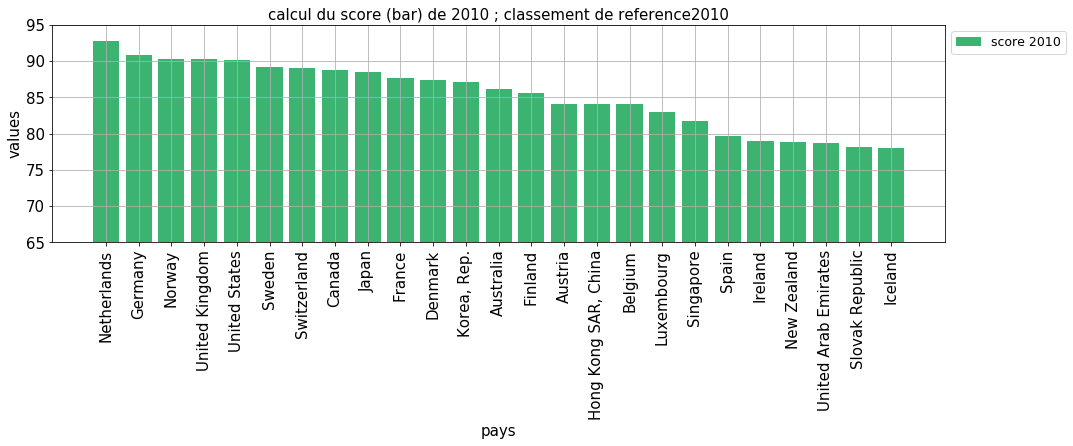

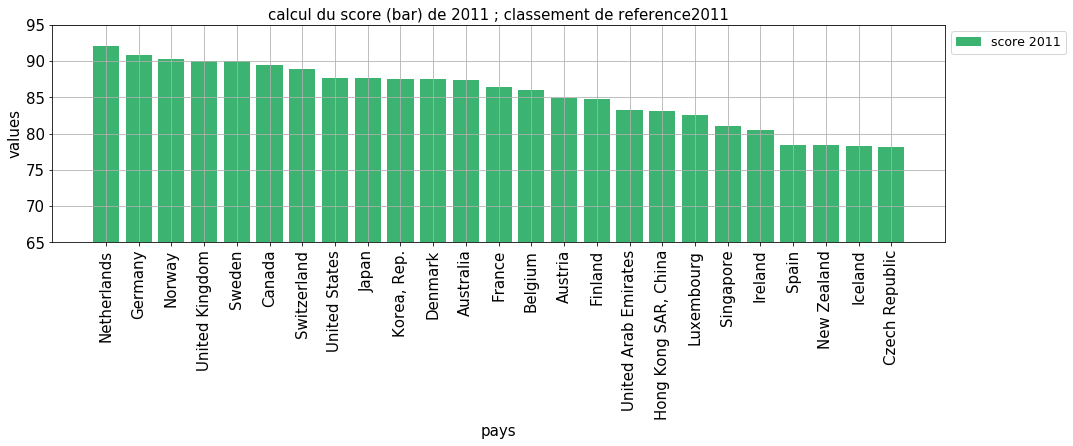

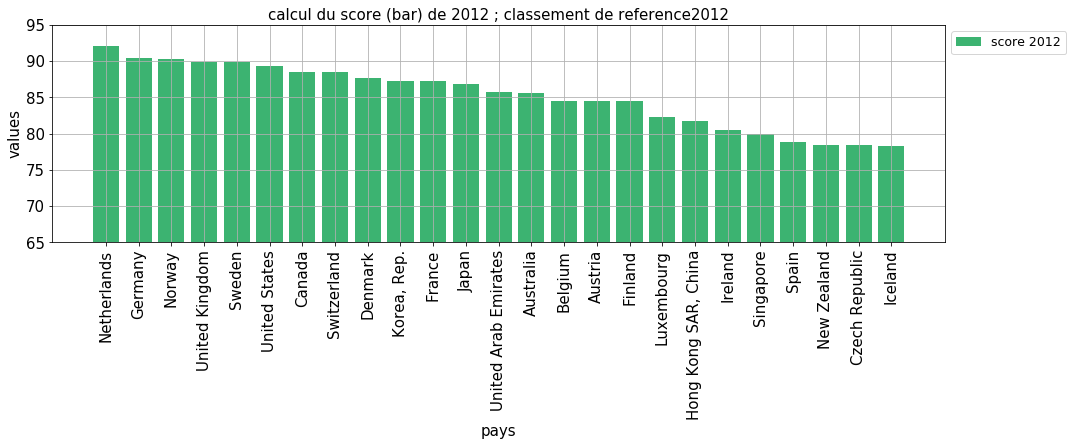

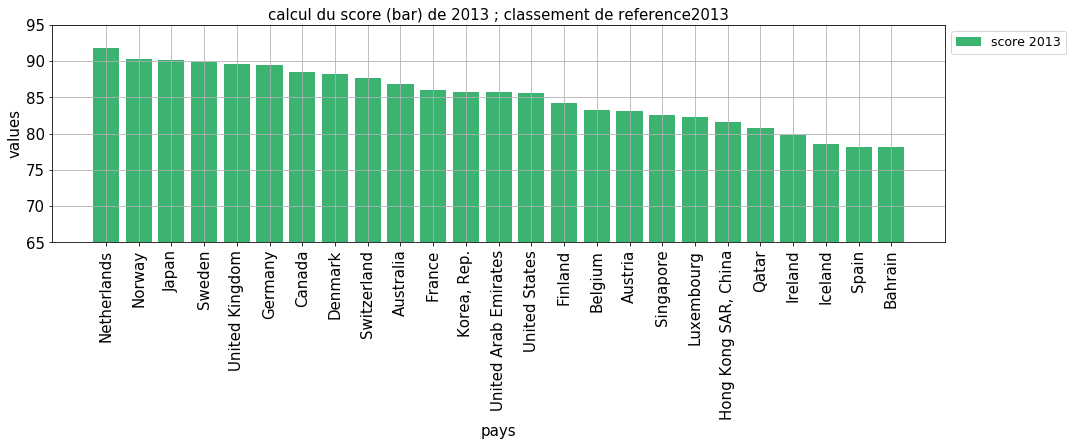

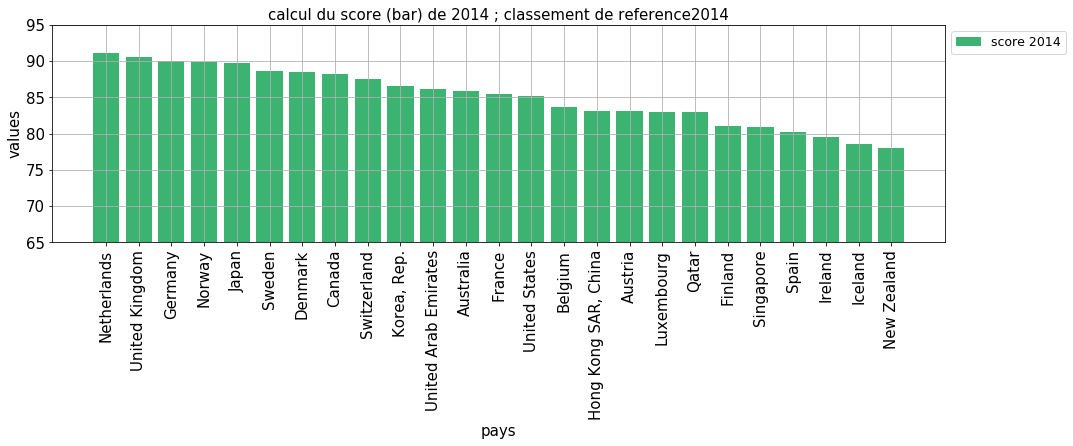

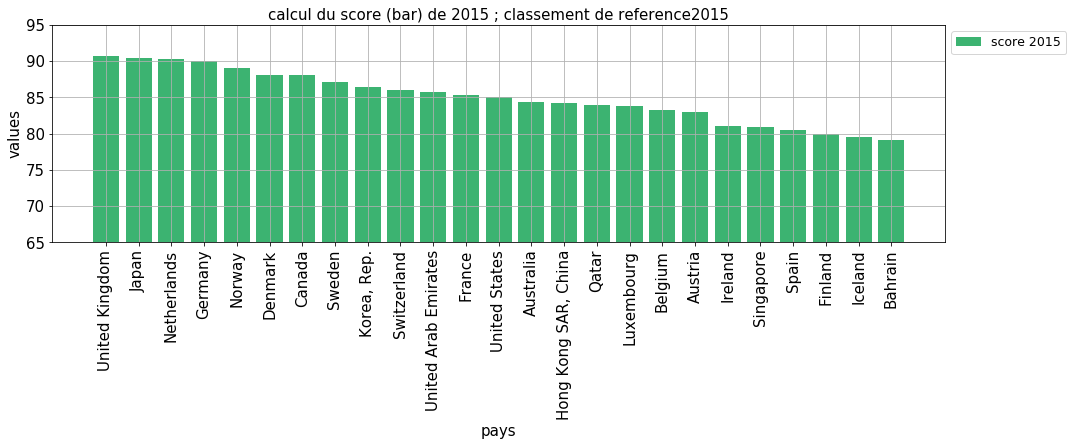

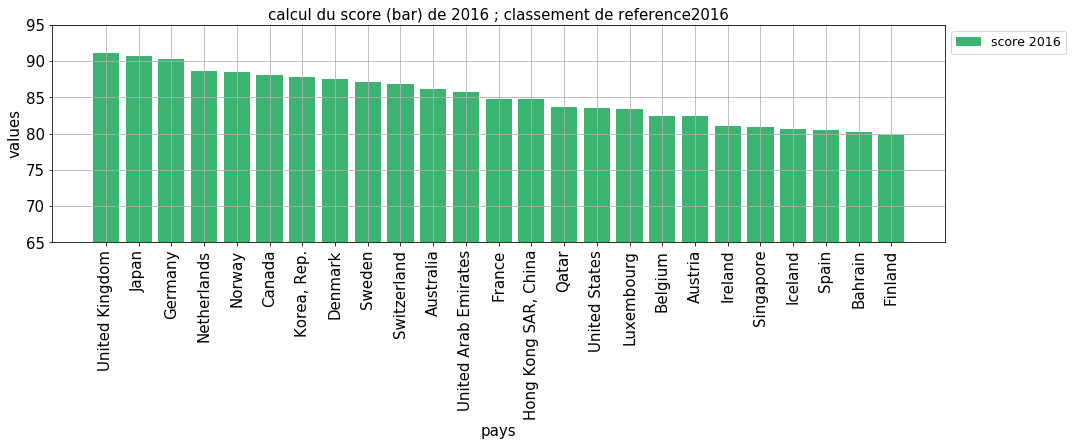

In [73]:
#classement du pays en fonction du score annee après annee
for j in range(2010,2017):
    an=str(j)
    x=[i for i in range(1,26)]
    df_etudeScore=df_etudeScore.sort_values((an,"score"),ascending = False)
    valPays=df_etudeScore.index.tolist()[:25]
    plt.figure(figsize=(16,4))
    plt.bar(x,df_etudeScore[(an,"score")][:25],color="mediumseagreen",label='score '+an)
    plt.ylim(65,95)
    plt.yticks(np.arange(65, 100, step=5))
    plt.gca().set_xticklabels(valPays,rotation=90)
    plt.xticks(x)
    plt.xlabel("pays")
    plt.ylabel("values")
    plt.grid()
    plt.legend(bbox_to_anchor=(1, 1),loc=2)
    plt.title("calcul du score (bar) de "+an+" ; classement de reference"+an);
    plt.savefig('Classement_'+an+'_bar.png', bbox_inches='tight',format='png')
    

### b-1) Calcul du score  entre 2010 et 2016, classement de reference 2016 (Première figure )

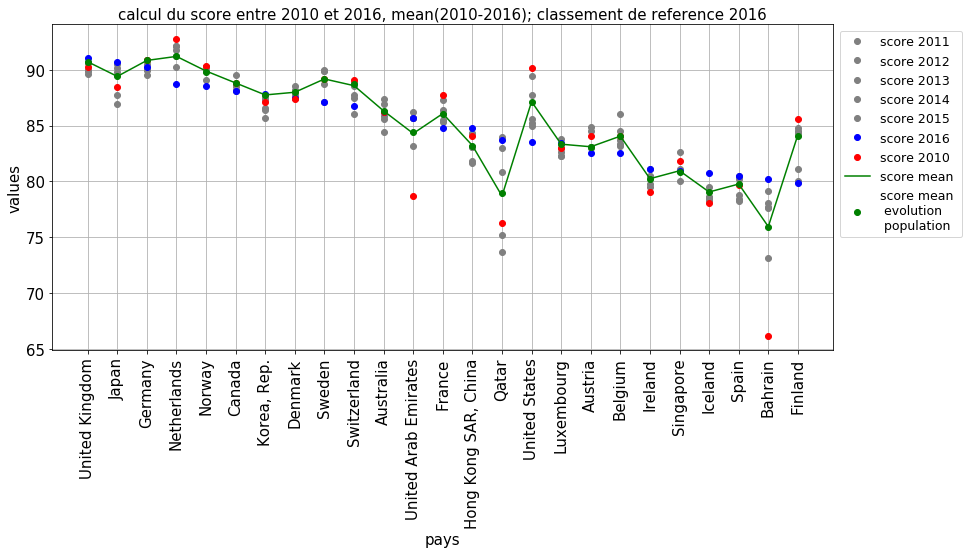

In [74]:
#classement du pays en fonction du score de 2016
df_etudeScore=df_etudeScore.sort_values(("2016","score"),ascending = False)

#figure pays prioritaires
x=[i for i in range(1,26)]
valPays=df_etudeScore.index.tolist()[:25]
plt.figure(figsize=(14,6))
plt.plot(x,df_etudeScore[("2011","score")][:25],'o',label='score 2011',color="gray")
plt.plot(x,df_etudeScore[("2012","score")][:25],'o',label='score 2012',color="gray")
plt.plot(x,df_etudeScore[("2013","score")][:25],'o',label='score 2013',color="gray")
plt.plot(x,df_etudeScore[("2014","score")][:25],'o',label='score 2014',color="gray")
plt.plot(x,df_etudeScore[("2015","score")][:25],'o',label='score 2015',color="gray")
plt.plot(x,df_etudeScore[("2016","score")][:25],'o',label='score 2016',color="blue")
plt.plot(x,df_etudeScore[("2010","score")][:25],'o',label='score 2010',color="red")
plt.plot(x,df_etudeScore[("mean","score")][:25],label='score mean',color="green")
plt.plot(x,df_etudeScore[("mean","score evolution")][:25],'o',label='score mean \n evolution\n population',color="green")
plt.gca().set_xticklabels(valPays,rotation=90)
plt.xticks(x)
plt.xlabel("pays")
plt.ylabel("values")
plt.legend(bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.title("calcul du score entre 2010 et 2016, mean(2010-2016); classement de reference 2016");

plt.savefig('Classement_2010_2016_point.png', bbox_inches='tight',format='png')

### b-2) Calcul du score  entre 2010 et 2016, classement de reference 2016 ( figure de type barchart )

In [108]:
#classement avec une figure de type barchart
#recuperation valeur min et max du score entre 2010 et 2016
table_score=df_etudeScore.xs('score', level=1, axis=1)
#table_score=table_score.drop('mean',axis=1)
valmax=table_score.loc[:,"2000":"2016"].max(axis=1).tolist()
valmin=table_score.loc[:,"2000":"2016"].min(axis=1).tolist()
val_2016=df_etudeScore[("2016","score")].tolist()

In [109]:
#prise en compte de l'oscillation du score
erreur = []
for v in range(len(valmax)):
    erreur.append([val_2016[v]-valmin[v],valmax[v]-val_2016[v]])
erreur_1 = np.transpose(erreur)
erreur[:3]
erreur_1[:,:3]

array([[1.43, 3.81, 0.72],
       [0.  , 0.  , 0.59]])

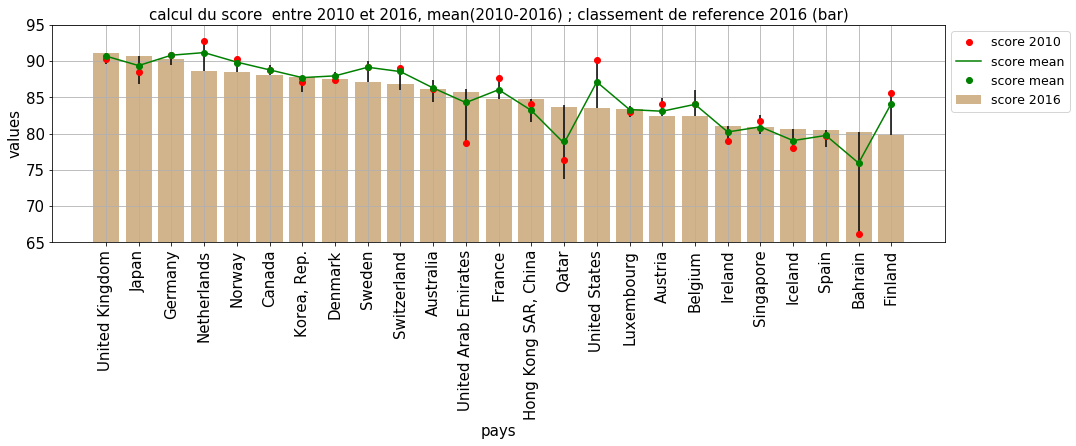

In [119]:
# figure de score
x=[i for i in range(1,26)]
y=list(range(120,140,5))
valPays=df_etudeScore.index.tolist()[:25]
plt.figure(figsize=(16,4))
plt.bar(x,df_etudeScore[("2016","score")][:25], yerr=erreur_1[:,:25],label='score 2016', color="tan")
plt.plot(x,df_etudeScore[("2010","score")][:25],'o',label='score 2010',color="red")
plt.plot(x,df_etudeScore[("mean","score")][:25],label='score mean',color="green")
plt.plot(x,df_etudeScore[("mean","score evolution")][:25],'o',label='score mean',color="green")

plt.ylim(65,95)
plt.yticks(np.arange(65, 100, step=5))
plt.gca().set_xticklabels(valPays,rotation=90)
plt.xticks(x)
plt.grid()
plt.xlabel("pays")
plt.ylabel("values")
plt.legend(bbox_to_anchor=(1, 1),loc=2)
plt.title("calcul du score  entre 2010 et 2016, mean(2010-2016) ; classement de reference 2016 (bar)");
plt.savefig('Classement_2010_2016_bar.png', bbox_inches='tight',format='png')

<i>L'analyse de l'évolution du classement des 25 pays prioritaires montre <b>4 types de tendances</b>.</i> <br/>
<p>*1/Certains pays dans la liste ont des scores haut et assez stable tel que : <br/>
United Kingdom, Germany, Canada, Danemark,Luxembourg </p>

<p>*2/ Certains pays dans la liste voient leur score croître au fil des années tel que : <br/>
'Ireland', 'Iceland', 'Bahrain'</p>

<p>*3/ Certains pays parmi ont des scores instables (une oscillation plus ou moins entre les 
valeurs) tel que : <br/>
Qatar, australia</p>

<p>4/ Certains pays parmi voient leur score décroître au fil des années tel que : <br/>
'Netherlands', 'Norway', 'United States', 'Finland'</p>


In [144]:
def listPays_classement (an,df):
    df=df.sort_values((an,"score"),ascending = False)
    pays_prioritaire=df.index.tolist()
    return pays_prioritaire

j=[i for i  in range(2010,2017)]
pays_prioritaire={}
for i in range(0,7):
    pays_prioritaire[j[i]]=listPays_classement(str(j[i]),df_etudeScore)

In [143]:
for an in range(2010,2016):
    print(set(pays_prioritaire[2016][:25])-set(pays_prioritaire[an][:25]),
          set(pays_prioritaire[an][:25])-set(pays_prioritaire[2016][:25]))
#Les 25 pays du classement de 2016 qui n'etait pas prioritaire sont Bahrain et Qatar 
# les pays manquants dans la liste est souvent New zealand sinon Slovak/Csech Republic 

{'Qatar', 'Bahrain'} {'New Zealand', 'Slovak Republic'}
{'Qatar', 'Bahrain'} {'New Zealand', 'Czech Republic'}
{'Qatar', 'Bahrain'} {'New Zealand', 'Czech Republic'}
set() set()
{'Bahrain'} {'New Zealand'}
set() set()


In [145]:
List_25pays=pays_prioritaire[2016][:25]
#pays des  deux region trouvees comme prioritaire
pays_prioritaire_North_America=\
Country[Country["Table Name"].isin(List_25pays) & (Country["Region"]== 'North America')]["Table Name"].tolist()
pays_prioritaire_Europe_centralAsia=\
Country[Country["Table Name"].isin(List_25pays) & (Country["Region"]== 'Europe & Central Asia')]["Table Name"].tolist()
print("Les pays prioritaires d'Amérique du nord sont \n:", pays_prioritaire_North_America)

print("\n Les pays prioritaires en 2016 en Europe et Asie centale sont \n:", pays_prioritaire_Europe_centralAsia)
# liste des regions des pays prioritaires
Region_prioritaire_2016=Country[Country["Table Name"].isin(List_25pays)]["Region"].unique()
Region_prioritaire_2016

Les pays prioritaires d'Amérique du nord sont 
: ['Canada', 'United States']

 Les pays prioritaires en 2016 en Europe et Asie centale sont 
: ['Austria', 'Belgium', 'Switzerland', 'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'United Kingdom', 'Ireland', 'Iceland', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden']


array(['Middle East & North Africa', 'East Asia & Pacific',
       'Europe & Central Asia', 'North America'], dtype=object)

In [146]:
region_Bahrain=Country[Country["Table Name"]=="Bahrain"]["Region"]
region_Qatar=Country[Country["Table Name"]=="Qatar"]["Region"]
region_Bahrain, region_Qatar# les deux sont du Middle East & North Africa

(20    Middle East & North Africa
 Name: Region, dtype: object,
 183    Middle East & North Africa
 Name: Region, dtype: object)

### V-3/ Analyse et compréhension

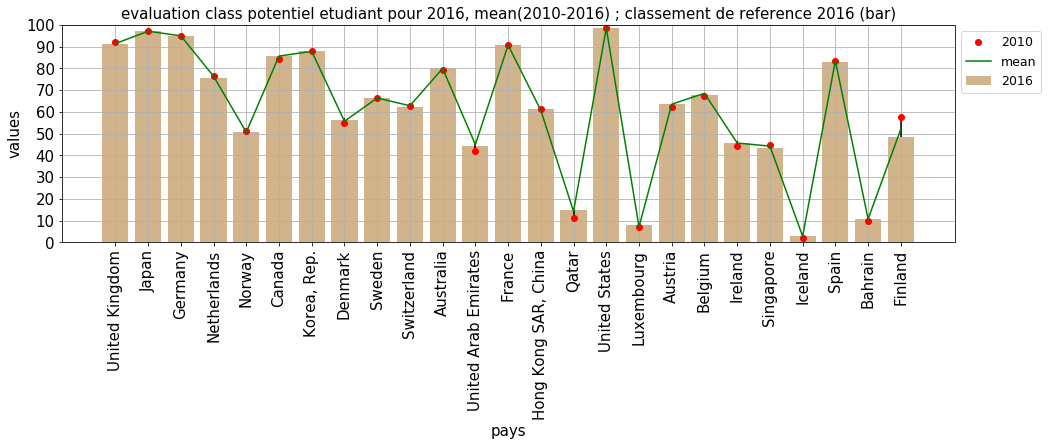

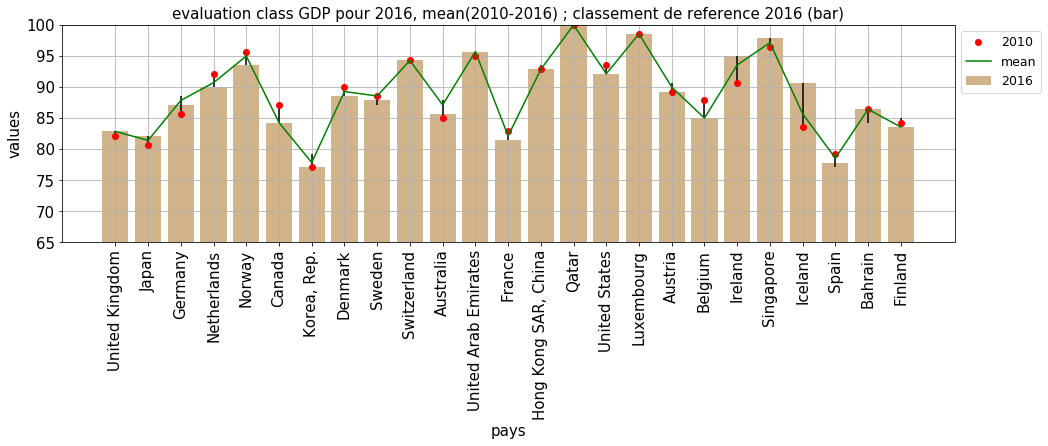

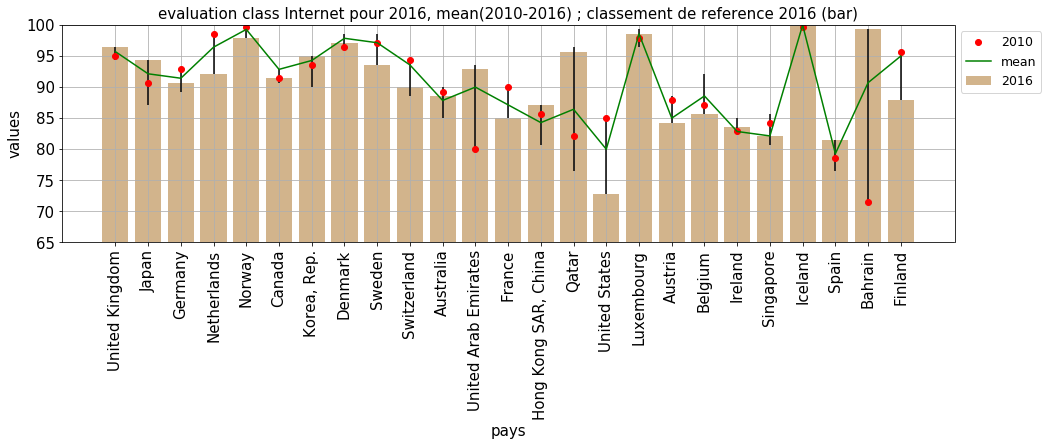

In [107]:
class_indicateurs=["class potentiel etudiant","class GDP","class Internet"]
#class_indicateurs=["class Internet"]
for val in class_indicateurs:
        table_score=df_etudeScore.xs(val, level=1, axis=1)
        #table_score=table_score.drop('mean',axis=1)
        valmax=table_score.loc[:,"2000":"2016"].max(axis=1).tolist()
        valmin=table_score.loc[:,"2000":"2016"].min(axis=1).tolist()
        val_2016=df_etudeScore[("2016",val)].tolist()
        
        erreur = []
        for v in range(len(valmax)):
            erreur.append([val_2016[v]-valmin[v],valmax[v]-val_2016[v]])
            erreur_1 = np.transpose(erreur)
            
        x=[i for i in range(1,26)]
        y=list(range(120,140,5))
        valPays=df_etudeScore.index.tolist()[:25]
        plt.figure(figsize=(16,4))
        plt.bar(x,df_etudeScore[("2016",val)][:25], yerr=erreur_1[:,:25],label='2016', color="tan")
        plt.plot(x,df_etudeScore[("2010",val)][:25],'o',label='2010',color="red")
        plt.plot(x,df_etudeScore[("mean",val)][:25],label='mean',color="green")
        
        min=65; pas=5
        if val == "class potentiel etudiant":
            min=0; pas=10
        plt.ylim(min,100)
        plt.yticks(np.arange(min, 105, step=pas))
        plt.gca().set_xticklabels(valPays,rotation=90)
        plt.xticks(x)
        plt.xlabel("pays")
        plt.ylabel("values")
        plt.grid()
        plt.legend(bbox_to_anchor=(1, 1),loc=2)
        plt.title("evaluation "+val+" pour 2016, mean(2010-2016) ; classement de reference 2016 (bar)");
        plt.savefig('Explication_evolotion_score'+val+'.png', bbox_inches='tight',format='png')

La Finlande présente une évolution de la classe potentiel étudiant" et de la classe  "Internet" décroissante. Ce sont ces deux facteurs qui expliquent la décroissance de son score. <br/>
En dehors de la Finlande, l'évolution de la "classe potentiel étudiant" est assez stable. Aussi les changements  relevés sur le classement des pays sont en grande partie dues aux changements sur la "class Internet" et la "class GDP".<br/>
Les plus grandes variations de scores identifiées sur le classement des pays sont observées sur la "class Internet".  Comme par exemple la forte oscillation vu sur le Qatar.<br/>
De même, l a présence de Baharain dans les classements des 25 est également due à la croissance de son score sur la classe Internet.
En ce qui concerne les pays identifiés comme assez stable en 2016, ils ont pour certains obtenus cette stabilité en compensant entre les valeurs de la "class Internet" à celui de la "class GDP"

## V-4/Établissement de la liste des pays prioritaire en fonction soit de la moyenne soit des tendances

In [238]:
table_score.loc[:,"std"]=table_score.loc[:,"2010":"2016"].std(axis=1, skipna=True, numeric_only=True)
table_score.loc[:,"min diff_2010"]=table_score.loc[:,"2010":"2016"].min(axis=1, skipna=True, numeric_only=True)-\
table_score.loc[:,"2010"]
table_score.loc[:,"min diff_2016"]=table_score.loc[:,"2010":"2016"].min(axis=1, skipna=True, numeric_only=True)-\
table_score.loc[:,"2016"]
table_score.loc[:,"max diff_2010"]=table_score.loc[:,"2010":"2016"].max(axis=1, skipna=True, numeric_only=True)-\
table_score.loc[:,"2010"]
table_score.loc[:,"max diff_2016"]=table_score.loc[:,"2010":"2016"].max(axis=1, skipna=True, numeric_only=True)-\
table_score.loc[:,"2016"]
# choix de la list des 25 
List_25=table_score.sort_values("2016",ascending = False)[:25]

##choix par rapport a la moyenne
List_25pays_prioritaire_choixMoyenne=List_25.sort_values("mean",ascending = False).index.tolist()
print("La liste des 25 pays prioritaires suivant la moyenne: \n",List_25pays_prioritaire_choixMoyenne,"\n")

##choix par rapport au tendances
#stabilité
pays_prioritaire_choixstd=List_25.sort_values("std",ascending = True)
List_pays_stable=pays_prioritaire_choixstd[pays_prioritaire_choixstd["std"] < 1].index.tolist()
List_pays_instable=pays_prioritaire_choixstd[pays_prioritaire_choixstd["std"] >= 1].index.tolist()
#croissance et décroissance
List_pays_scoreCroissant=\
List_25[(List_25["min diff_2010"]== 0.) & (List_25["max diff_2016"]== 0.)].index.tolist()
List_pays_scoreDecroissant=\
List_25[(List_25["min diff_2016"]== 0.) & (List_25["max diff_2010"]== 0.)].index.tolist()
#####print(List_pays_scoreDecroissant)
#classification avec stable
#List_pays_stable_croissant=sorted(set.intersection(*map(set, [List_pays_stable, List_pays_scoreCroissant])),
#                                 key=List_pays_stable.index)
List_pays_stable_decroissant=sorted(set.intersection(*map(set, [List_pays_stable, List_pays_scoreDecroissant])),
                                 key=List_pays_stable.index)
List_pays_stable_reste=sorted(set(List_pays_stable)-set(List_pays_stable_decroissant),
                                  key=List_pays_stable.index)

#classification avec instable
List_pays_instable_croissant=sorted(set.intersection(*map(set, [List_pays_instable, List_pays_scoreCroissant])),
                                 key=List_pays_instable.index)
List_pays_instable_decroissant=sorted(set.intersection(*map(set, [List_pays_instable, List_pays_scoreDecroissant])),
                                     key=List_pays_instable.index)
List_pays_instable_invariant=sorted(set(List_pays_instable)-set(List_pays_instable_croissant)-\
                                set(List_pays_instable_decroissant),key=List_pays_instable.index)

#Liste definitive
List_25pays_prioritaire_choixtendance=List_pays_stable_reste+List_pays_stable_decroissant+\
List_pays_instable_croissant+List_pays_instable_invariant+\
List_pays_instable_decroissant

print("La liste des 25 pays prioritaires suivant la tendance \n", List_25pays_prioritaire_choixtendance)


La liste des 25 pays prioritaires suivant la moyenne: 
 ['Netherlands', 'Germany', 'United Kingdom', 'Norway', 'Japan', 'Sweden', 'Canada', 'Switzerland', 'Denmark', 'Korea, Rep.', 'United States', 'Australia', 'France', 'United Arab Emirates', 'Finland', 'Belgium', 'Luxembourg', 'Hong Kong SAR, China', 'Austria', 'Singapore', 'Ireland', 'Spain', 'Iceland', 'Qatar', 'Bahrain'] 

La liste des 25 pays prioritaires suivant la tendance 
 ['Denmark', 'Germany', 'Canada', 'United Kingdom', 'Luxembourg', 'Korea, Rep.', 'Ireland', 'Singapore', 'Austria', 'Iceland', 'Australia', 'Spain', 'Norway', 'Bahrain', 'Switzerland', 'Belgium', 'Hong Kong SAR, China', 'Sweden', 'Japan', 'United Arab Emirates', 'Qatar', 'France', 'Netherlands', 'United States', 'Finland']


### Question : Est que cela aurait été différent avec le même taux de scolarité que 2010?

In [263]:
# autre analyse
#traitement des NaN pour le taux de scolarité
for i in range(2011,2017):
    val=str(i)
    df_pays_analyse[val]=np.where(df_pays_analyse[val].isna(),df_pays_analyse["2010"],
                                   df_pays_analyse[val])

df_pays_analyse.loc[:,"2010":"2016"]

,2010,2011,2012,2013,2014,2015,2016
92003,16.090000,16.090000,16.090000,16.090000,16.090000,16.090000,16.090000
92005,6.880000,6.880000,6.880000,6.880000,6.880000,6.880000,6.880000
92105,19299.000000,19896.326941,20547.474615,21228.669451,21904.420766,22549.119166,23155.501842
92872,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509
93000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
...,...,...,...,...,...,...,...
883645,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
883745,8347.000000,8523.094347,8713.014983,8914.230416,9123.251208,9337.250108,9555.374765
884512,1445.042395,1667.137950,1905.837880,1997.052201,2027.933139,2040.272449,2031.020179
884640,6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989


réponse :Non


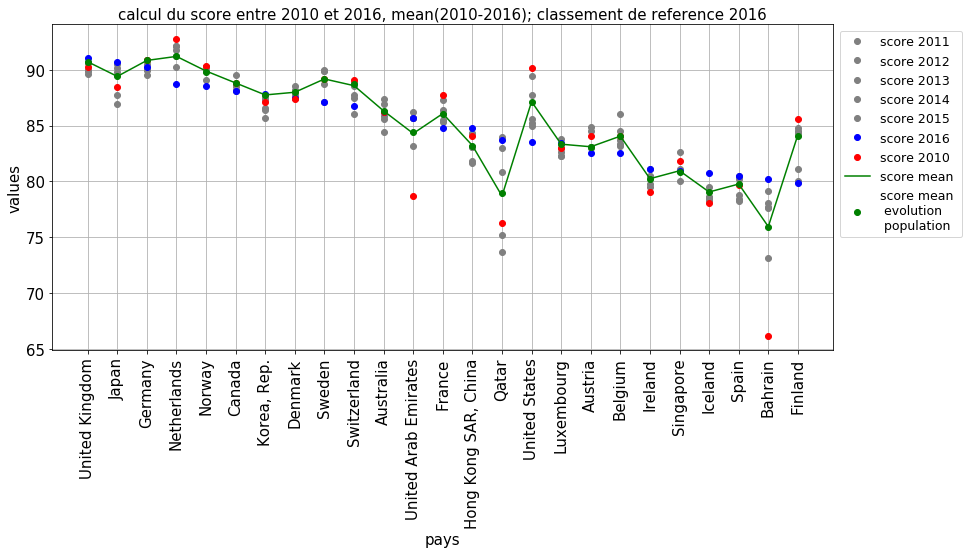

In [265]:
df_etude=df_pays_analyse.loc[:,["Country Name","Indicator Name"]].join(df_pays_triNaN.loc[:,'2010':'2016'])
df_etude.loc[:,"mean"]=df_etude.loc[:,:].mean(axis=1, skipna=True, numeric_only=True)
#df_etude
df_etudeScore=df_etude.set_index(["Country Name","Indicator Name"]).unstack()


df_etudeScore[("mean","projection Population")]=df_etudeScore[("mean","Barro-Lee: Population in thousands, age 15+, total")]*\
df_etudeScore[("mean","Population growth (annual %)")]/100 +\
df_etudeScore[("mean","Barro-Lee: Population in thousands, age 15+, total")]

df_etudeScore=df_etudeScore.drop('Population growth (annual %)',level=1, axis=1)
colonne_etude=[i for i in range(2010,2017)]
colonne_etude.append("mean")


for i in colonne_etude:
    val=str(i)
    df_etudeScore[(val,"potentiel etudiant")]=\
    (df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)')]+\
     df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)')])*\
    df_etudeScore[(val,'Barro-Lee: Population in thousands, age 15+, total')]/100
    df_etudeScore[(val,"class GDP")]=class_indicateur('GDP per capita, PPP (current international $)',
                                                  df_etudeScore[val])
    df_etudeScore[(val,"class potentiel etudiant")]=class_indicateur("potentiel etudiant",
                                                                          df_etudeScore[val])
    df_etudeScore[(val,"class Internet")]=class_indicateur("Internet users (per 100 people)",
                                                           df_etudeScore[val])
    df_etudeScore[(val,"score")]=(df_etudeScore[(val,"class potentiel etudiant")]*1+\
                                  df_etudeScore[(val,"class Internet")]*3+df_etudeScore[(val,"class GDP")]*2)/6
    df_etudeScore[(val,"score")]=[round(i,2) for i in df_etudeScore[(val,"score")]]
    
for i in ["mean"]:
    val=str(i)
    df_etudeScore[(val,"potentiel etudiant")]=\
    (df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)')]+\
     df_etudeScore[(val,'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)')])*\
    df_etudeScore[(val,'projection Population')]/100
    df_etudeScore[(val,"class GDP")]=class_indicateur('GDP per capita, PPP (current international $)',
                                                  df_etudeScore[val])
    df_etudeScore[(val,"class potentiel etudiant")]=class_indicateur("potentiel etudiant",
                                                                          df_etudeScore[val])
    df_etudeScore[(val,"class Internet")]=class_indicateur("Internet users (per 100 people)",
                                                           df_etudeScore[val])
    df_etudeScore[(val,"score evolution")]=(df_etudeScore[(val,"class potentiel etudiant")]*1+\
                                  df_etudeScore[(val,"class Internet")]*3+df_etudeScore[(val,"class GDP")]*2)/6
    df_etudeScore[(val,"score evolution")]=[round(i,2) for i in df_etudeScore[(val,"score evolution")]]
    
#classement du pays en fonction du score de 2016
df_etudeScore=df_etudeScore.sort_values(("2016","score"),ascending = False)

#figure pays prioritaires
x=[i for i in range(1,26)]
valPays=df_etudeScore.index.tolist()[:25]
plt.figure(figsize=(14,6))
plt.plot(x,df_etudeScore[("2011","score")][:25],'o',label='score 2011',color="gray")
plt.plot(x,df_etudeScore[("2012","score")][:25],'o',label='score 2012',color="gray")
plt.plot(x,df_etudeScore[("2013","score")][:25],'o',label='score 2013',color="gray")
plt.plot(x,df_etudeScore[("2014","score")][:25],'o',label='score 2014',color="gray")
plt.plot(x,df_etudeScore[("2015","score")][:25],'o',label='score 2015',color="gray")
plt.plot(x,df_etudeScore[("2016","score")][:25],'o',label='score 2016',color="blue")
plt.plot(x,df_etudeScore[("2010","score")][:25],'o',label='score 2010',color="red")
plt.plot(x,df_etudeScore[("mean","score")][:25],label='score mean',color="green")
plt.plot(x,df_etudeScore[("mean","score evolution")][:25],'o',label='score mean \n evolution\n population',color="green")
plt.gca().set_xticklabels(valPays,rotation=90)
plt.xticks(x)
plt.xlabel("pays")
plt.ylabel("values")
plt.legend(bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.title("calcul du score entre 2010 et 2016, mean(2010-2016); classement de reference 2016");

print("réponse :Non")

# Conclusion

Le classement des pays en fonction du score évoluent année après année.<br/>
La dernière année exploitable de mes données est 2016 <br/>
Pour la mission, je choisis de privilégier les pays existant dans le classement de 2016 pour une éventuelle expansion de l'entreprise en 2021. Cependant je classe leur priorité en fonction des tendances d'évolution du score observées:
<b>['Denmark', 'Germany', 'Canada', 'United Kingdom', 'Luxembourg', 'Korea, Rep.', 'Ireland', 'Singapore', 'Austria', 'Iceland', 'Australia', 'Spain', 'Norway', 'Bahrain', 'Switzerland', 'Belgium', 'Hong Kong SAR, China', 'Sweden', 'Japan', 'United Arab Emirates', 'Qatar', 'France', 'Netherlands', 'United States', 'Finland']</b>  <br/>  
ou bien en fonction du classement de ces pays obtenue avec la moyenne: <br/>
<b>['Netherlands', 'Germany', 'United Kingdom', 'Norway', 'Japan', 'Sweden', 'Canada', 'Switzerland', 'Denmark', 'Korea, Rep.', 'United States', 'Australia', 'France', 'United Arab Emirates', 'Finland', 'Belgium', 'Luxembourg', 'Hong Kong SAR, China', 'Austria', 'Singapore', 'Ireland', 'Spain', 'Iceland', 'Qatar', 'Bahrain']</b>